### Purpose of Project:  Predicting  Fuel   and  capacity_mw for  Global Power Plant 

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database

The database includes the following features:

- country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long` (text): longer form of the country designation
- name` (text): name or title of the power plant, generally in Romanized form
- gppd_idnr` (text): 10 or 12 character identifier for the power plant
- capacity_mw` (number): electrical generating capacity in megawatts
- latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel` (text): energy source used in primary electricity generation or export
- other_fuel1` (text): energy source used in electricity generation or export
- other_fuel2` (text): energy source used in electricity generation or export
- other_fuel3` (text): energy source used in electricity generation or export
- commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- owner` (text): majority shareholder of the power plant, generally in Romanized form
- source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url` (text): web document corresponding to the `source` field
- geolocation_source` (text): attribution for geolocation information
- wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data` (number): year the capacity information was reported
- generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source` (text): attribution for the reported generation information
- estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
- Fuel Type AggregationWe define the "Fuel Type" attribute of our database based on common fuel categories. Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# Importing necessary Libraries 

In [80]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings ('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [81]:
# loading Datasets
data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [82]:
data.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

The above result shows the first 5 rows and last 5 rows of the data set. I am observing some nulls values is some columns.

In [83]:
data.shape

(907, 27)

Datasets cotains 907 rows and 27 columns 

In [84]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

These are the 27 columns in the dataset. 

#  EDA

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

907 data entres(rows), data columns 27, 17 columns containing float and 12 object data type. Most of the columns contains nulls data, memmory usage is 191.4 +KB

In [86]:
# Checking for nulls values 
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

- Latitude and logitute have a missing values of 46
- Other_fuel1 has missing values of 709
- Other_fuel2 has a missing values of 906 at of 907 rows just on data recorded 
- Other_fuel3 has a complete rows values(907) are missing 
- geolocation_source has 19 missing values
- wepp_id has a comlete missing values in all rows 907
- year_of_capacity_data has a missing values of 388 at of 907 rows
- generation_gwh_2013 has a complete missing values in a rows 
- generation_gwh_2014 has a missinh values of 509 rows at of 907 total rows 
- generation_gwh_2015 has a missing values of 485 rows at of 907 total rows
- generation_gwh_2016 has a missing values of 473 rows at of 907 rows 
- generation_gwh_20117 has a missing values of 467 rows at of 907 total rows 
- generation_gwh_2018 has a missing values of 459 rows at of 459 total rows 
- generation_gwh_2019 has a missing values in all 907 rows
- generation_data_source has a missing values of 458 at of 907 total rows 
- estimated_generation_gwh  has a missing values in all 907 rows 

I will be droping some unwanted/irrelevant columns and using fillna to treat missing values. 





In [87]:
# Checking values counts before dropping irrelevant columns 
for i in  data:
    print(data[i].nunique)
    print('\n')

<bound method IndexOpsMixin.nunique of 0      IND
1      IND
2      IND
3      IND
4      IND
      ... 
902    IND
903    IND
904    IND
905    IND
906    IND
Name: country, Length: 907, dtype: object>


<bound method IndexOpsMixin.nunique of 0      India
1      India
2      India
3      India
4      India
       ...  
902    India
903    India
904    India
905    India
906    India
Name: country_long, Length: 907, dtype: object>


<bound method IndexOpsMixin.nunique of 0                  ACME Solar Tower
1               ADITYA CEMENT WORKS
2          AES Saurashtra Windfarms
3                       AGARTALA GT
4                      AKALTARA TPP
                   ...             
902                    YERMARUS TPP
903    Yelesandra Solar Power Plant
904    Yelisirur wind power project
905                     ZAWAR MINES
906         iEnergy Theni Wind Farm
Name: name, Length: 907, dtype: object>


<bound method IndexOpsMixin.nunique of 0      WRI1020239
1      WRI1019881
2      WRI1

Country and country_long are repeated data and both have a unique name India. 


# Dropping Unwanted/Irrelevant columns 

In [88]:
data.drop(['country','country_long','other_fuel1','other_fuel2','other_fuel3','url','geolocation_source','generation_gwh_2019','generation_data_source','estimated_generation_gwh',], inplace=True, axis=1)

I've dropped country, country_long because they contains just one unique name which I see has not contribution to our prediction. Other_fuel1, Other_fuel2,Other_fuel3  almost all the rows have missing values in this case I dropped them fellows with the respective irrelevant columns like wepp_id, url,geolocation_source , generation_gwh_2019, generation_data_source,year_of_capacity_data

In [89]:
data.drop(['year_of_capacity_data'],axis=1,inplace=True)

In [90]:
data.drop(['generation_gwh_2013'],axis=1,inplace=True)

In [91]:
data.drop(['wepp_id'],axis=1,inplace=True)

In [92]:
data.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
source                   0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

# Filling Missing Values

In [93]:
# using fillna to treat missing values
data['latitude'] =data['latitude'].fillna(data['latitude'].mean())
data['longitude'] =data['longitude'].fillna(data['longitude'].mean())
data['generation_gwh_2014'] = data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].median())
data['generation_gwh_2015'] = data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].median())
data['generation_gwh_2016'] = data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].median())
data['generation_gwh_2017'] = data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].median())
data['generation_gwh_2018'] = data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].median())

print(data.isnull().sum())


name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
source                   0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64


Missing values have been treated in the above respective columns left with commisioning_year and owner 

# Data Visualization  features and Label.

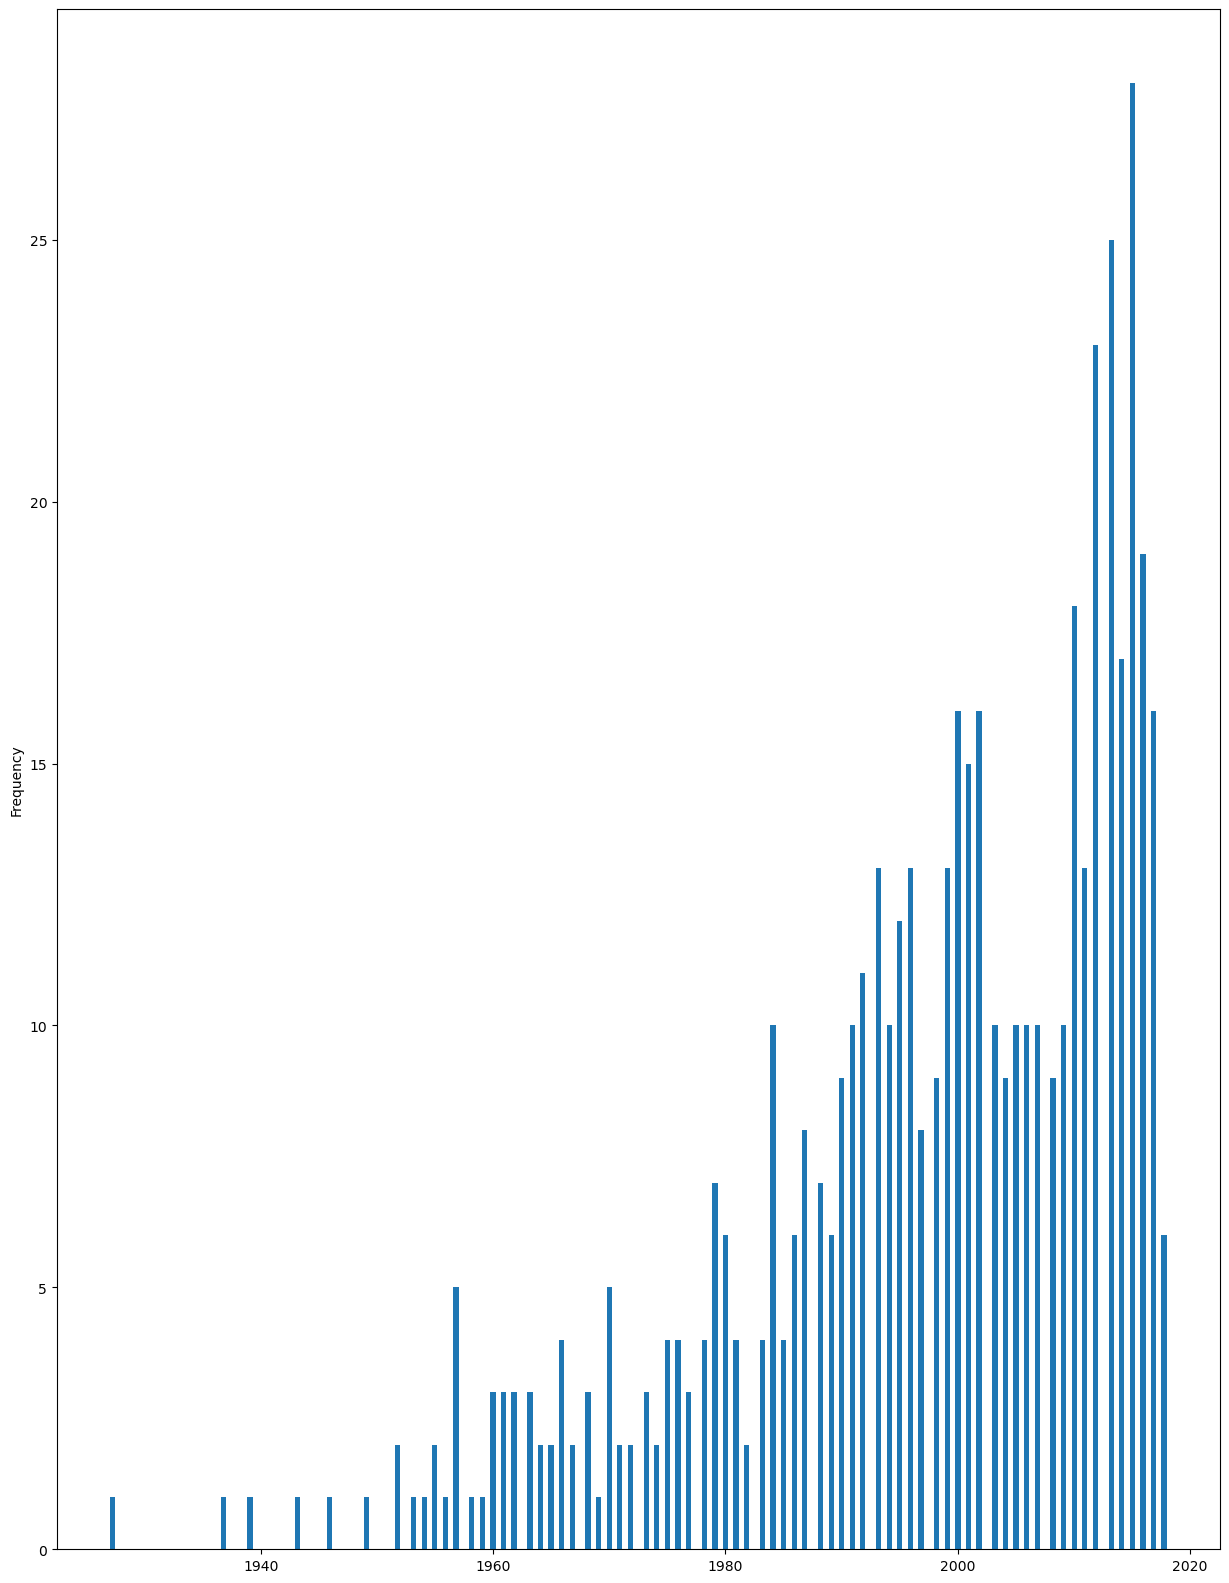

In [286]:
plt.figure(figsize=(15,20))
data.commissioning_year.plot(kind='hist',bins=200)
plt.show()

According to the above plot the first commisioning of generation plate took place in 1940, before this commissioning there are existing plates. While the last generation plate was 2020.

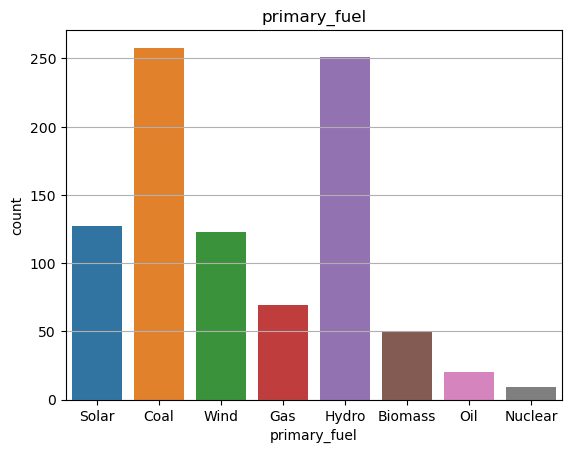

In [287]:
plt.figure()
plt.grid()
sns.countplot(x='primary_fuel', data= data)
plt.title('primary_fuel')
plt.yticks()
plt.show()

The above plot result shows that majority of the power generator plants uses Coal, fellowed by Hydro, average consider Solar and Wind 

###  Checking the distribution of the Generation electricity gig watt per hour 

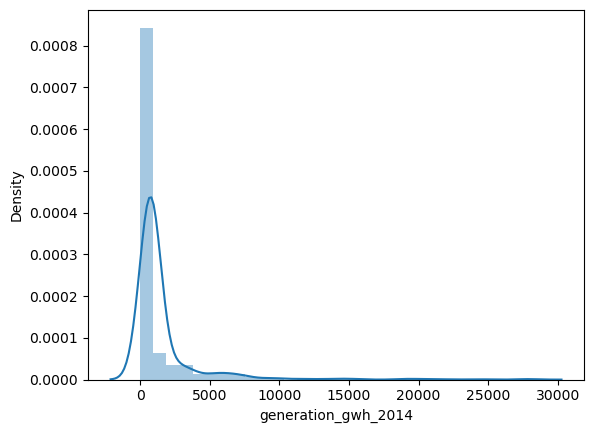

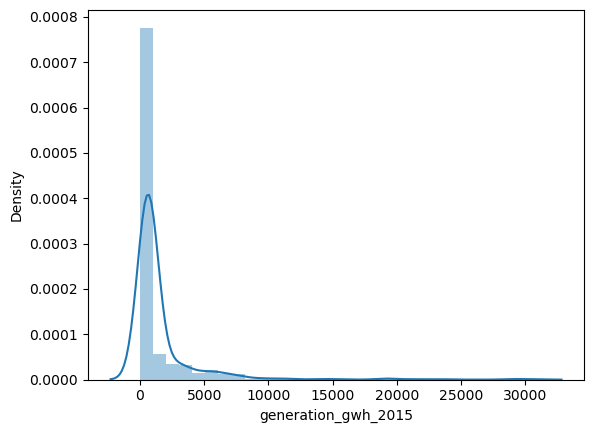

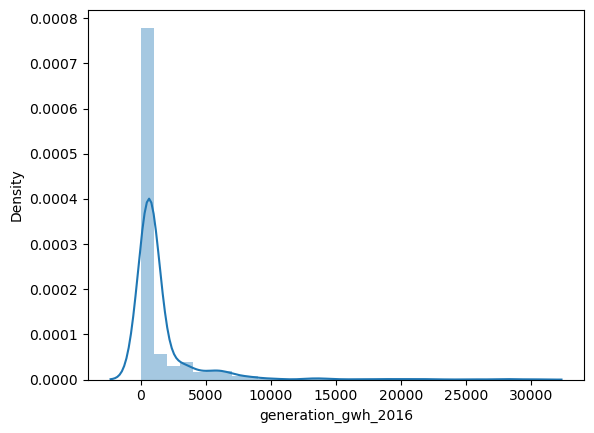

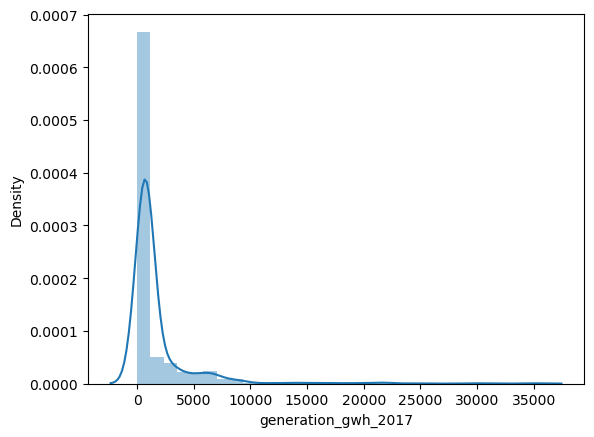

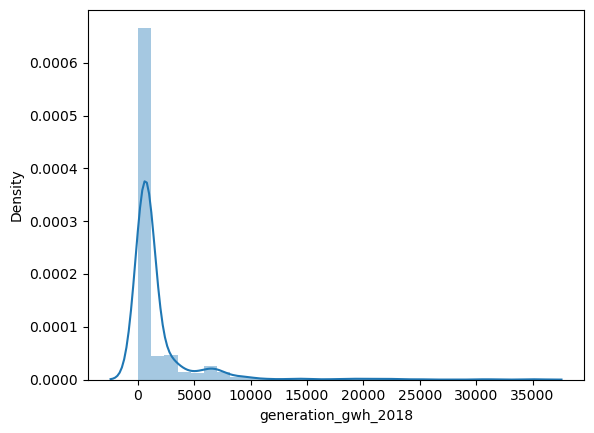

In [288]:
# Distribution of the generation_gwh
sns.distplot(data.generation_gwh_2014, kde = True)
plt.show()

sns.distplot(data.generation_gwh_2015, kde = True)
plt.show()

sns.distplot(data.generation_gwh_2016, kde = True)
plt.show()

sns.distplot(data.generation_gwh_2017, kde = True)
plt.show()

sns.distplot(data.generation_gwh_2018, kde = True)
plt.show()

The distribution plots for all the years are not looking normally distributed and the data is skew to the right 

# (Bivariate Analysis) Comparing two variables. 

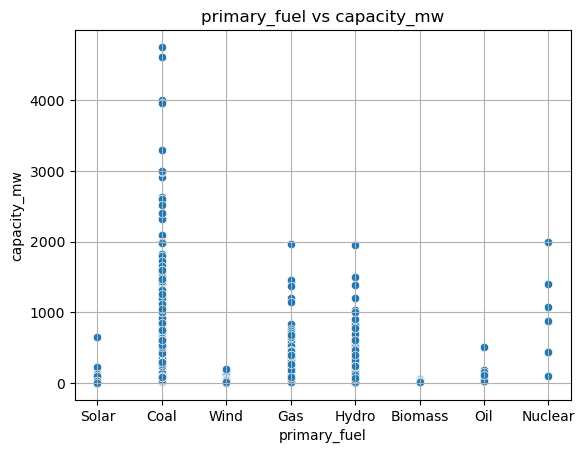

In [289]:
# comparing primary_fuel and capacity_mw
plt.figure()
plt.grid()
sns.scatterplot(x='primary_fuel', y='capacity_mw', data= data)
plt.title('primary_fuel vs capacity_mw')
plt.yticks()
plt.show()

The above plot shows majority of the plant capacity use coal. 

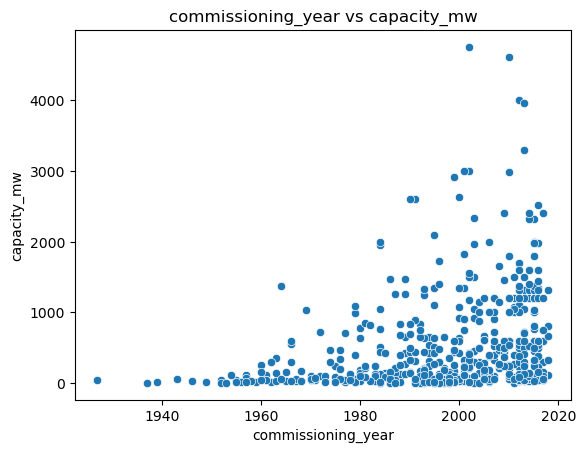

In [290]:
# comparing primary_fuel and capacity_mw
plt.figure()
sns.scatterplot(x='commissioning_year', y='capacity_mw', data= data)
plt.title('commissioning_year vs capacity_mw')
plt.show()

The above plot shows the increase in years of opening new plates the increase in capacity 

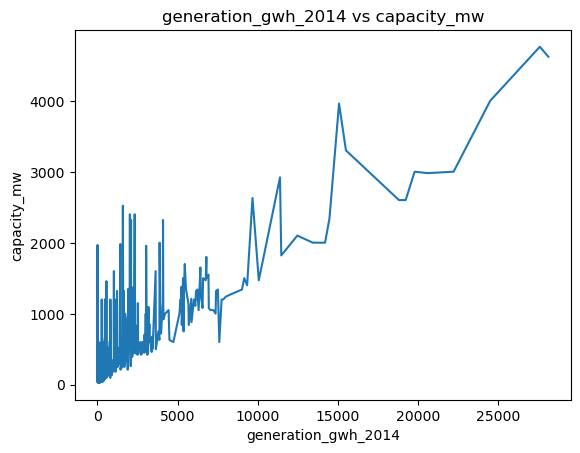

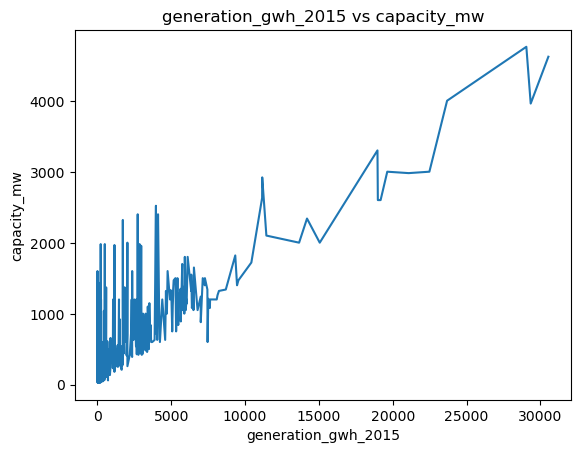

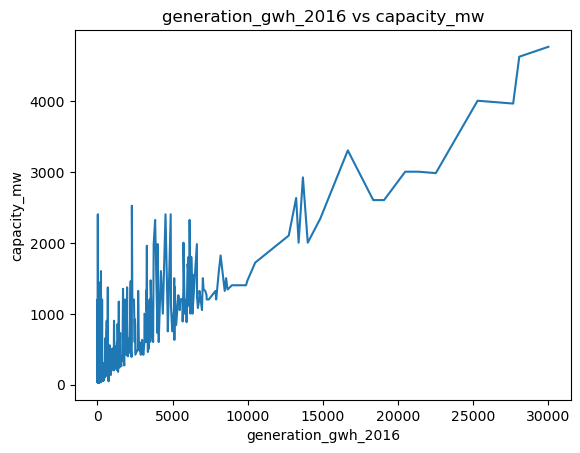

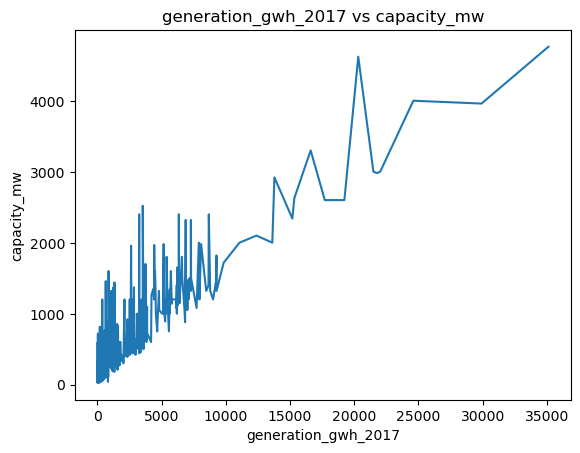

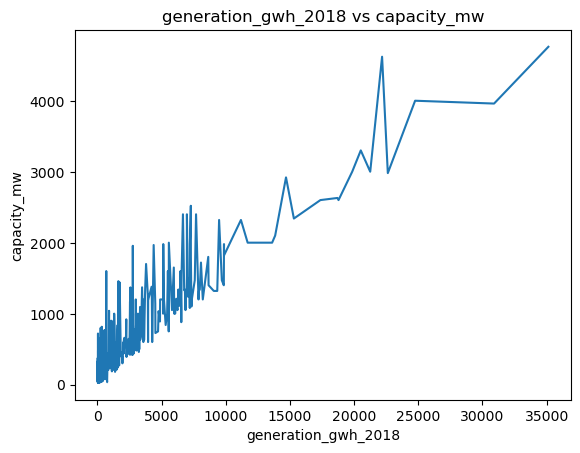

In [291]:
plt.figure()
sns.lineplot(x='generation_gwh_2014', y='capacity_mw', data= data)
plt.title('generation_gwh_2014 vs capacity_mw')
plt.show()

plt.figure()
sns.lineplot(x='generation_gwh_2015', y='capacity_mw', data= data)
plt.title('generation_gwh_2015 vs capacity_mw')
plt.show()

plt.figure()
sns.lineplot(x='generation_gwh_2016', y='capacity_mw', data= data)
plt.title('generation_gwh_2016 vs capacity_mw')
plt.show()

plt.figure()
sns.lineplot(x='generation_gwh_2017', y='capacity_mw', data= data)
plt.title('generation_gwh_2017 vs capacity_mw')
plt.show()

plt.figure()
sns.lineplot(x='generation_gwh_2018', y='capacity_mw', data= data)
plt.title('generation_gwh_2018 vs capacity_mw')
plt.show()

Increase in capacity increases the hours of power generation 

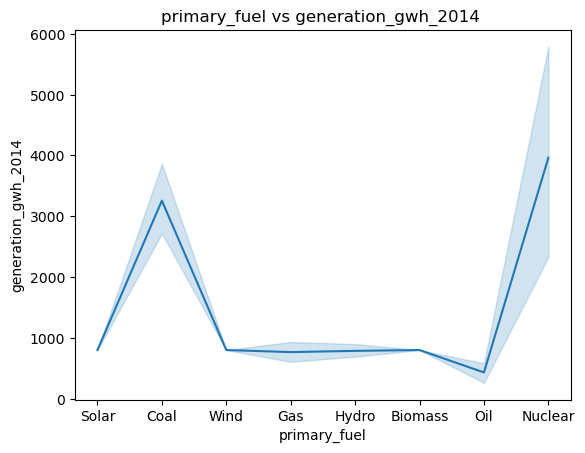

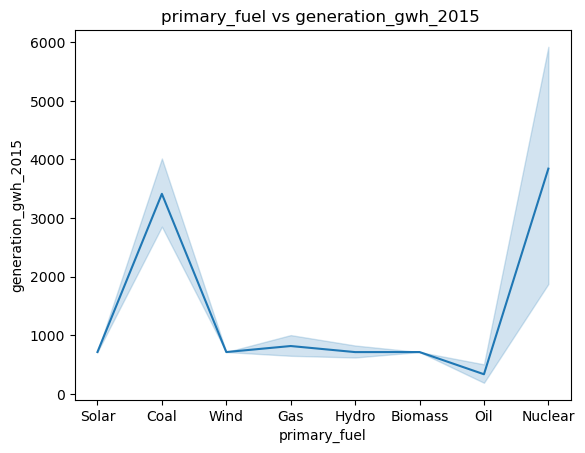

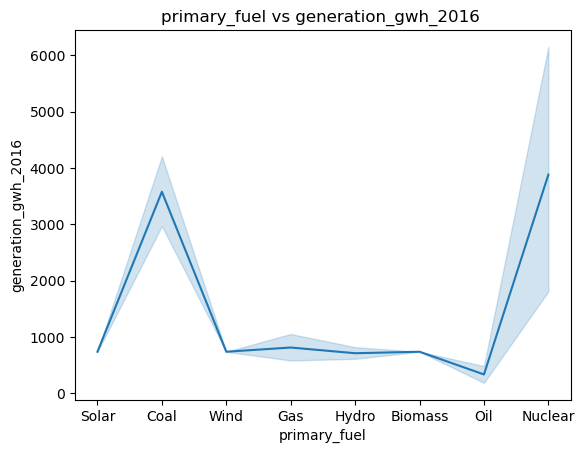

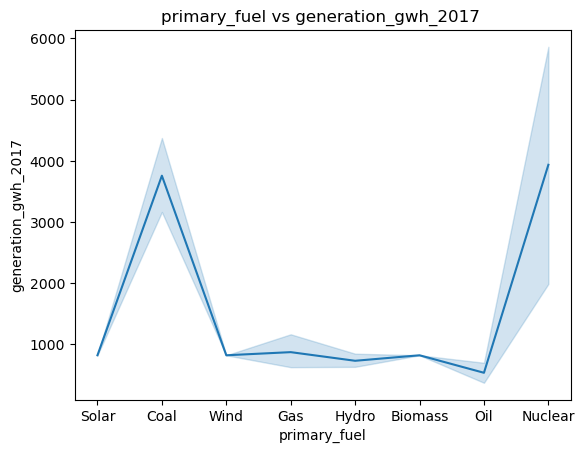

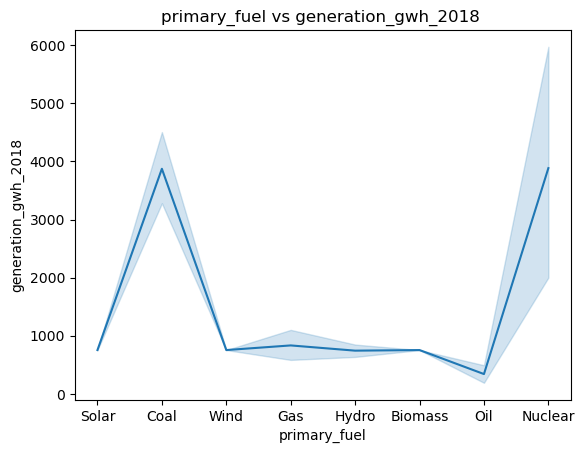

In [292]:
plt.figure()
sns.lineplot(x='primary_fuel', y='generation_gwh_2014', data= data)
plt.title('primary_fuel vs generation_gwh_2014 ')
plt.show()

plt.figure()
sns.lineplot(x='primary_fuel', y='generation_gwh_2015', data= data)
plt.title('primary_fuel vs generation_gwh_2015 ')
plt.show()

plt.figure()
sns.lineplot(x='primary_fuel', y='generation_gwh_2016', data= data)
plt.title('primary_fuel vs generation_gwh_2016 ')
plt.show()

plt.figure()
sns.lineplot(x='primary_fuel', y='generation_gwh_2017', data= data)
plt.title('primary_fuel vs generation_gwh_2017 ')
plt.show()

plt.figure()
sns.lineplot(x='primary_fuel', y='generation_gwh_2018', data= data)
plt.title('primary_fuel vs generation_gwh_2018 ')
plt.yticks()
plt.show()

According to the above plots results Coal and Nuclear are primary_fuel for power generation.

# Scatter Matrix for Visualizing more than one columns

In [94]:
from pandas. plotting import scatter_matrix

array([[<Axes: xlabel='capacity_mw', ylabel='capacity_mw'>,
        <Axes: xlabel='latitude', ylabel='capacity_mw'>,
        <Axes: xlabel='longitude', ylabel='capacity_mw'>,
        <Axes: xlabel='commissioning_year', ylabel='capacity_mw'>,
        <Axes: xlabel='generation_gwh_2014', ylabel='capacity_mw'>,
        <Axes: xlabel='generation_gwh_2015', ylabel='capacity_mw'>,
        <Axes: xlabel='generation_gwh_2016', ylabel='capacity_mw'>,
        <Axes: xlabel='generation_gwh_2017', ylabel='capacity_mw'>,
        <Axes: xlabel='generation_gwh_2018', ylabel='capacity_mw'>],
       [<Axes: xlabel='capacity_mw', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='commissioning_year', ylabel='latitude'>,
        <Axes: xlabel='generation_gwh_2014', ylabel='latitude'>,
        <Axes: xlabel='generation_gwh_2015', ylabel='latitude'>,
        <Axes: xlabel='generation_gwh_2016', ylabel='lati

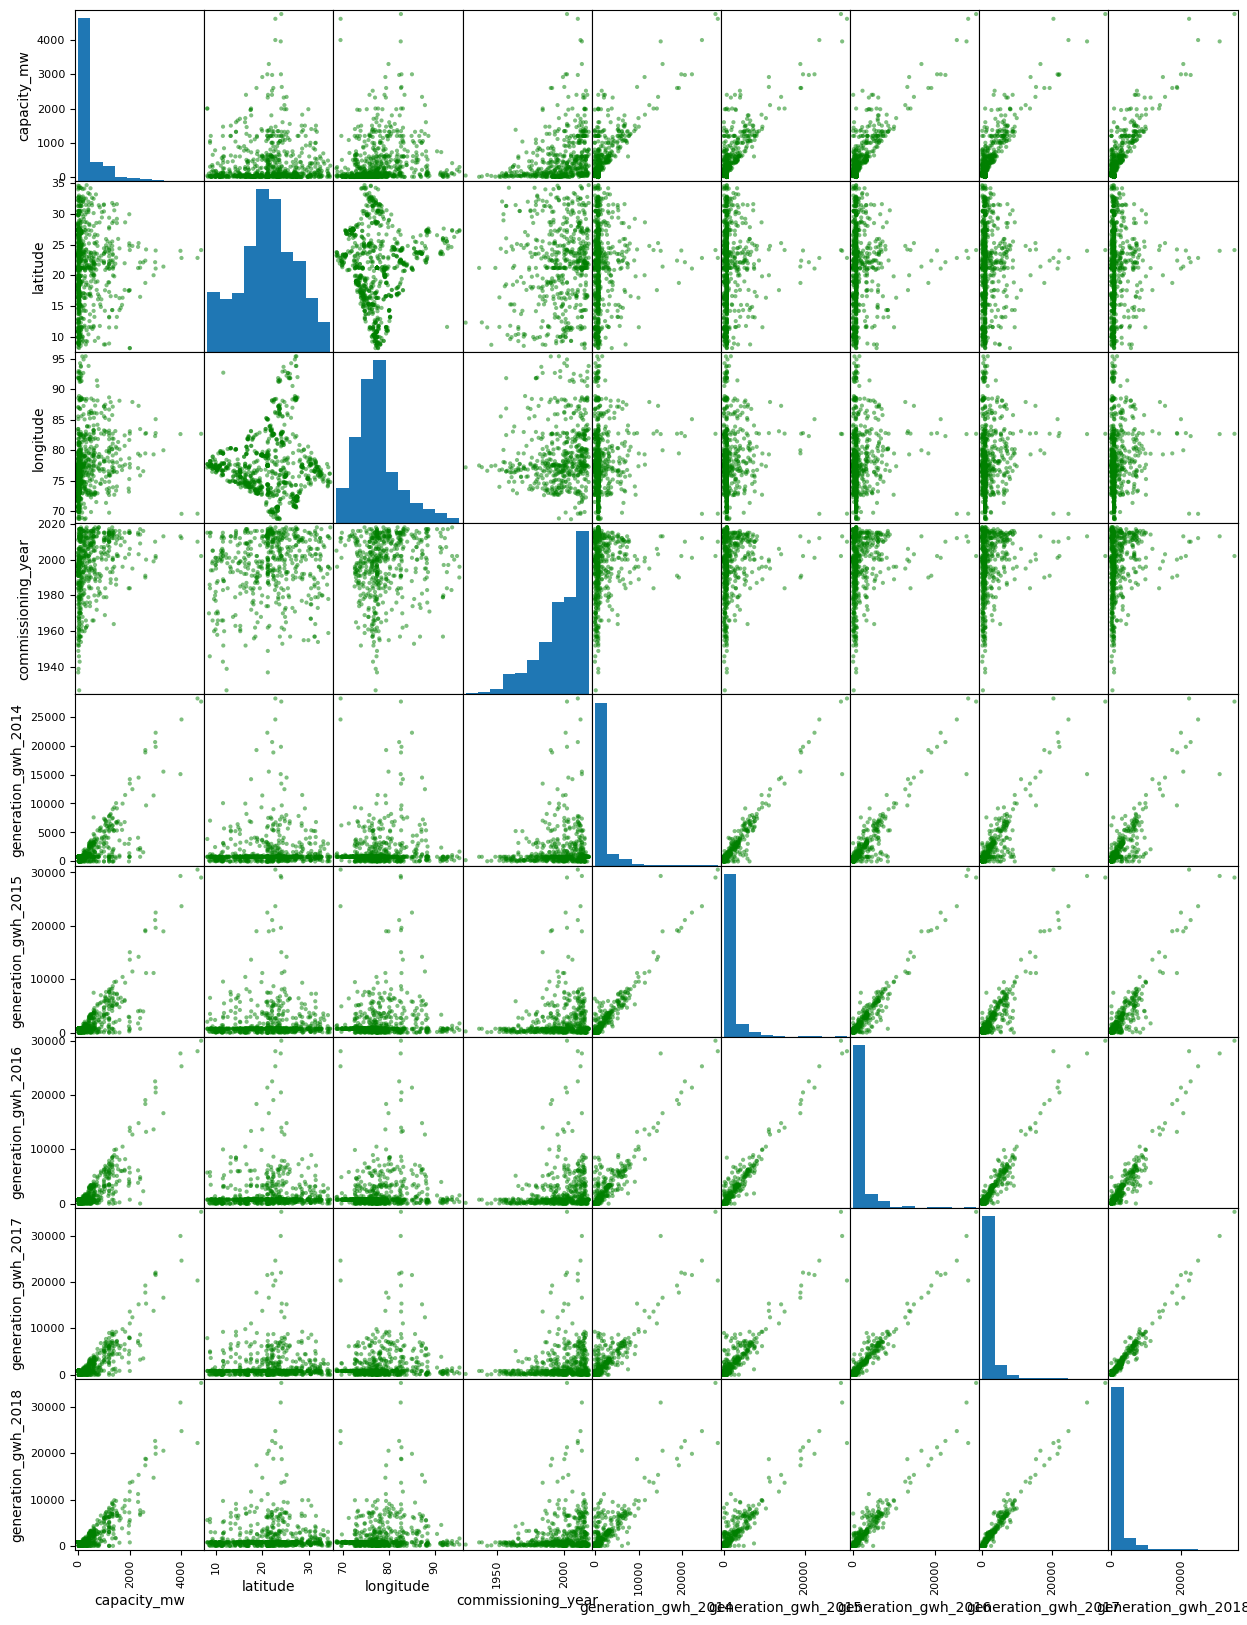

In [294]:
# Scatter matrix 
scatter_matrix(data, figsize=(15,20), color='g')

Commissioning year, latitde and logitutde are not showing any important attribute to target. lets see one more confirmation using pairplot

<Figure size 1500x2000 with 0 Axes>

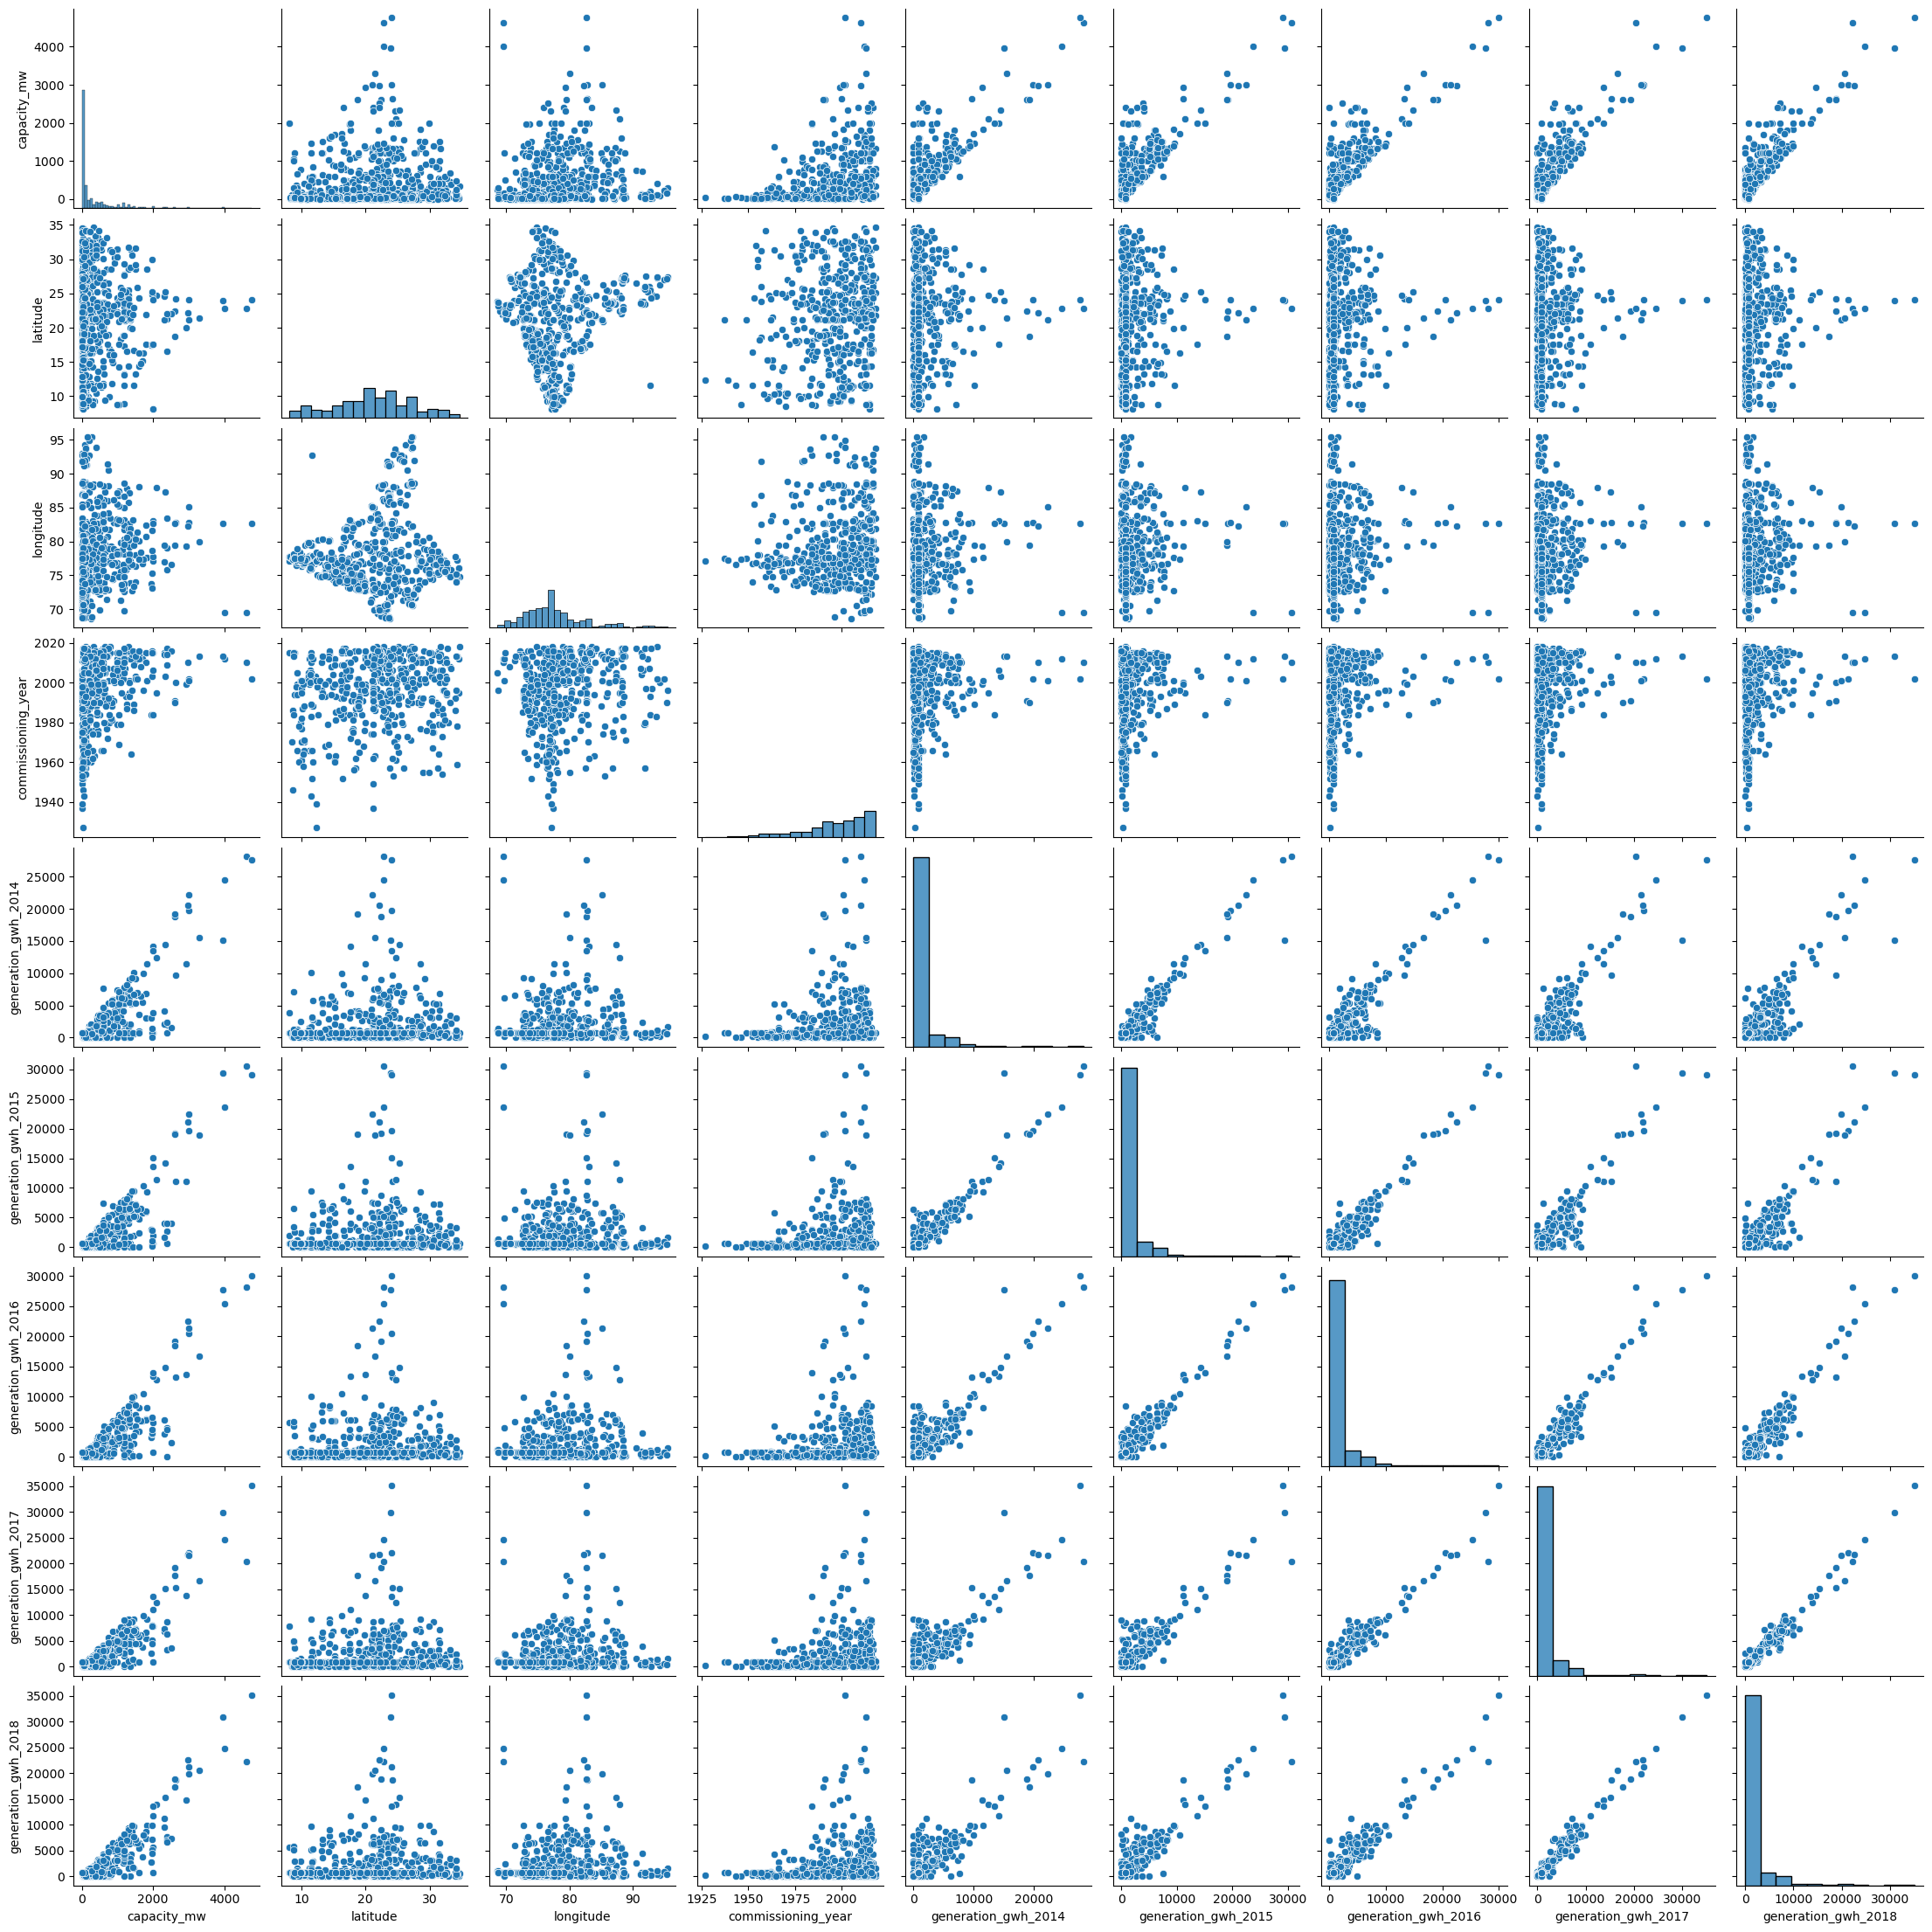

In [295]:
plt.figure(figsize=(15,20))
sns.pairplot(data)


Again, you can see latitude, logitute, commissioning year don't really have significant relationship with capacity and primary_fuel 

In [296]:
data.head()

name   gppd_idnr  capacity_mw  latitude  longitude  \
0          ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1       ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   
2  AES Saurashtra Windfarms  WRI1026669         39.2   21.9038    69.3732   
3               AGARTALA GT  IND0000001        135.0   23.8712    91.3602   
4              AKALTARA TPP  IND0000002       1800.0   21.9603    82.4091   

  primary_fuel  commissioning_year                 owner  \
0        Solar              2011.0           Solar Paces   
1         Coal                 NaN  Ultratech Cement ltd   
2         Wind                 NaN                   AES   
3          Gas              2004.0                   NaN   
4         Coal              2015.0                   NaN   

                                 source  generation_gwh_2014  \
0  National Renewable Energy Laboratory           801.123775   
1                  Ultratech Cement ltd           801.123775   
2                                   CDM           801.123775   
3         Central Electricity Authority           617.789264   
4         Central Electricity Authority          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225           737.205450           817.977250   
1           711.181225           737.205450           817.977250   
2           711.181225           737.205450           817.977250   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  
0           751.644375  
1           751.644375  
2           751.644375  
3           626.239128  
4          7279.000000

In [95]:
# Again I will be dropping irrelevant columns 
data.drop(['name','gppd_idnr','commissioning_year','owner','source'],axis=1,inplace=True)

In [298]:
data.head()

capacity_mw  latitude  longitude primary_fuel  generation_gwh_2014  \
0          2.5   28.1839    73.2407        Solar           801.123775   
1         98.0   24.7663    74.6090         Coal           801.123775   
2         39.2   21.9038    69.3732         Wind           801.123775   
3        135.0   23.8712    91.3602          Gas           617.789264   
4       1800.0   21.9603    82.4091         Coal          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225           737.205450           817.977250   
1           711.181225           737.205450           817.977250   
2           711.181225           737.205450           817.977250   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  
0           751.644375  
1           751.644375  
2           751.644375  
3           626.239128  
4          7279.000000

# Encoding label to numerican data


In [96]:
# importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['primary_fuel']=le.fit_transform(data['primary_fuel'])

data.head()

capacity_mw  latitude  longitude  primary_fuel  generation_gwh_2014  \
0          2.5   28.1839    73.2407             6           801.123775   
1         98.0   24.7663    74.6090             1           801.123775   
2         39.2   21.9038    69.3732             7           801.123775   
3        135.0   23.8712    91.3602             2           617.789264   
4       1800.0   21.9603    82.4091             1          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225           737.205450           817.977250   
1           711.181225           737.205450           817.977250   
2           711.181225           737.205450           817.977250   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  
0           751.644375  
1           751.644375  
2           751.644375  
3           626.239128  
4          7279.000000

Our label has been trasform from text alphabetical data to numerical data  

### Checking our the data is distribution after some cleaning up 

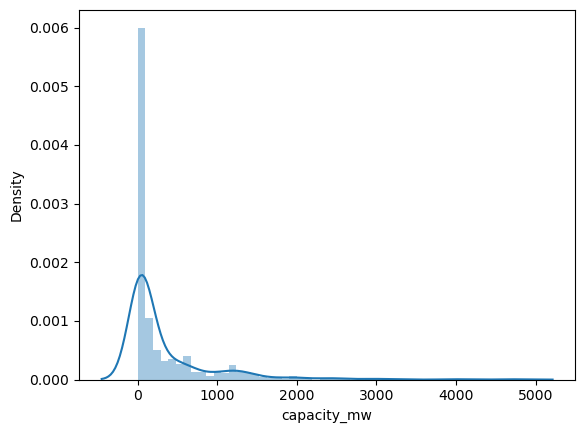

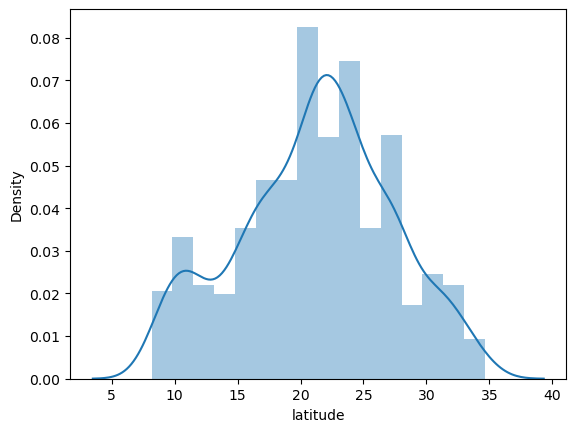

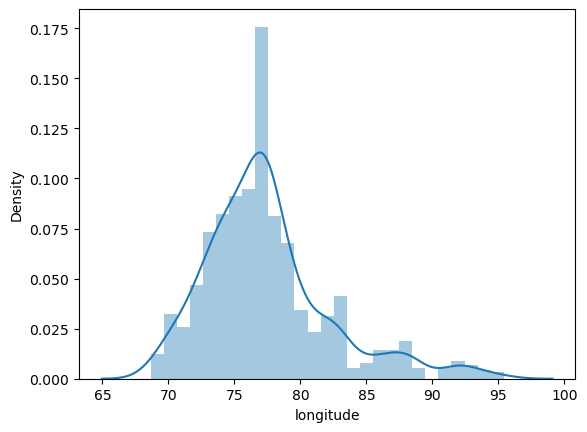

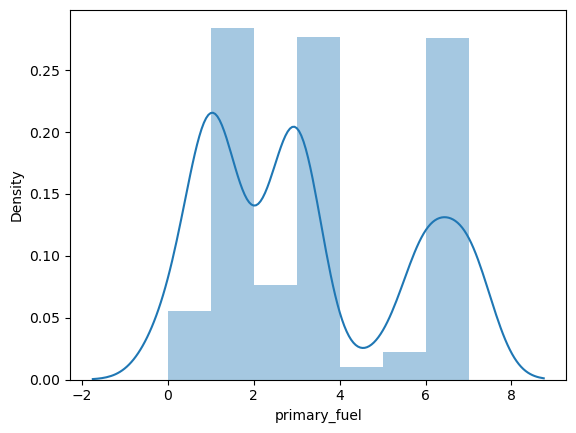

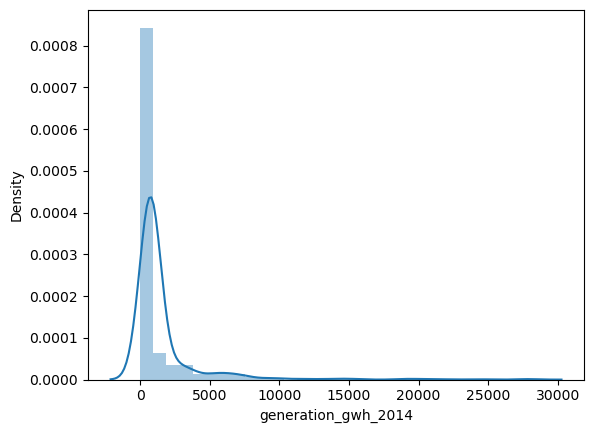

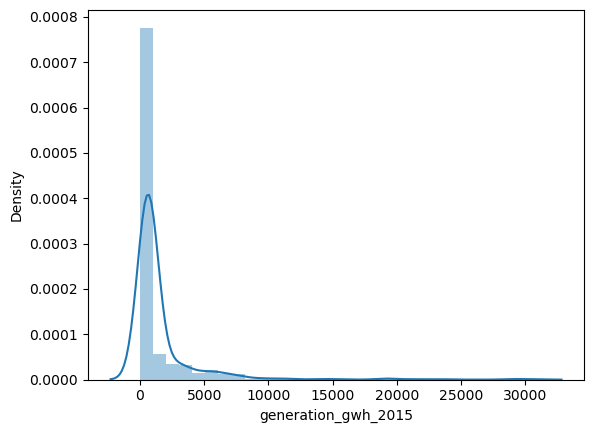

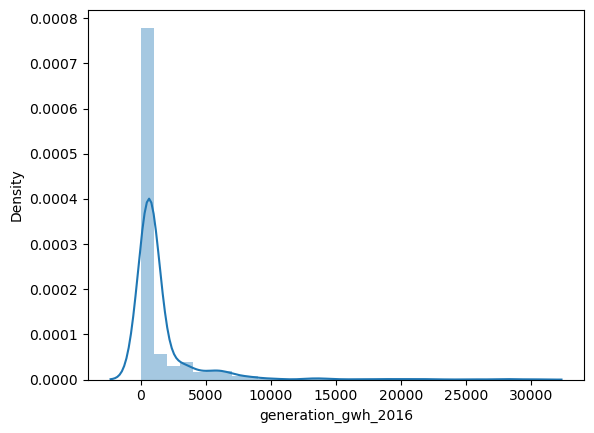

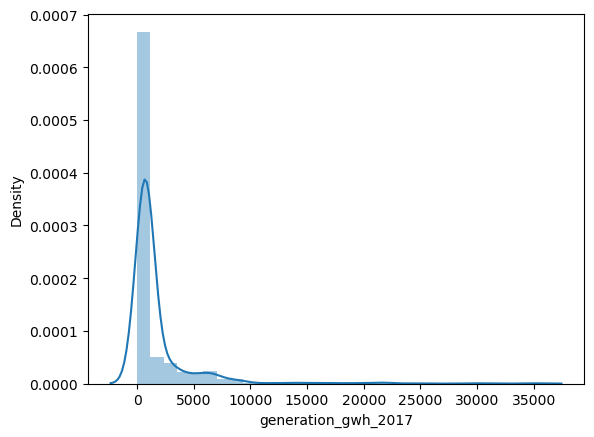

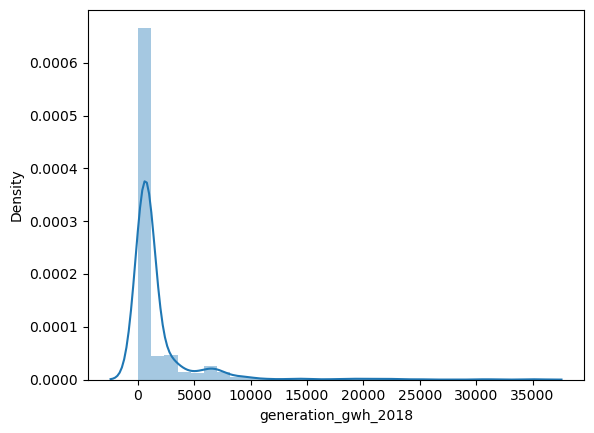

In [300]:
# Checking the Distribution of data
for i in data.columns:
    plt.figure()
    sns.distplot(data[i])

According to the distribution plot the data fellow a bell shape and skewed to the right. 

# Checking skewness 

In [17]:
data.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

The data is skew in most of the columns 

# Checking Outliers 

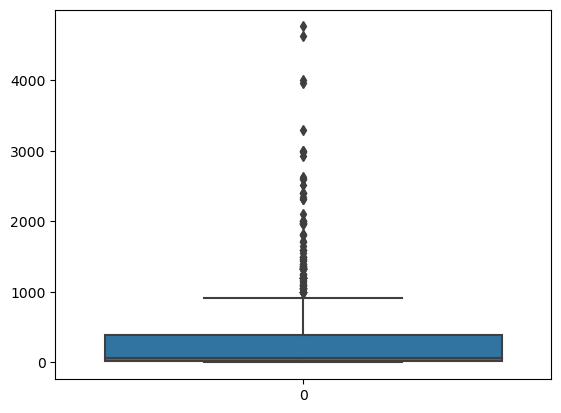

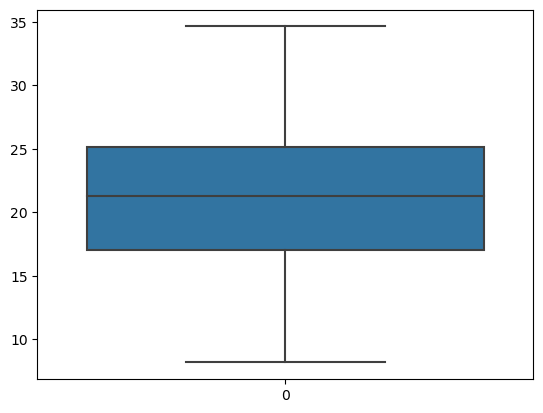

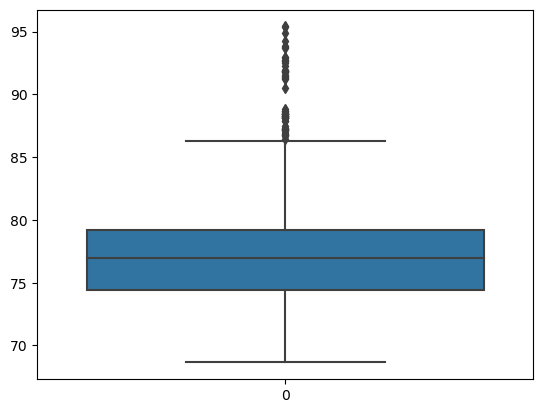

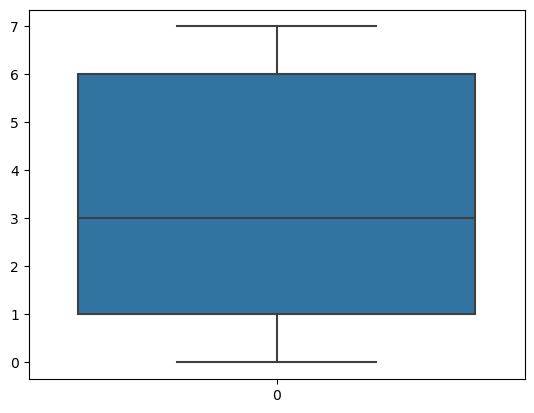

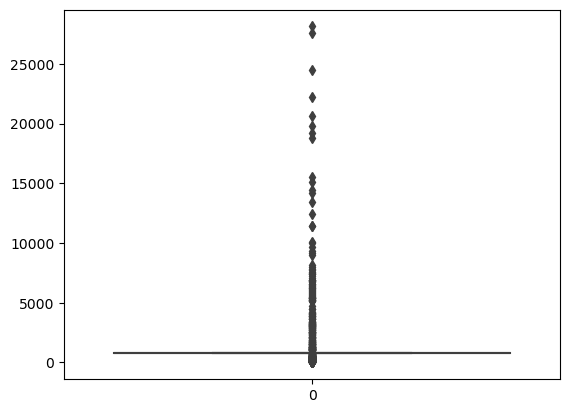

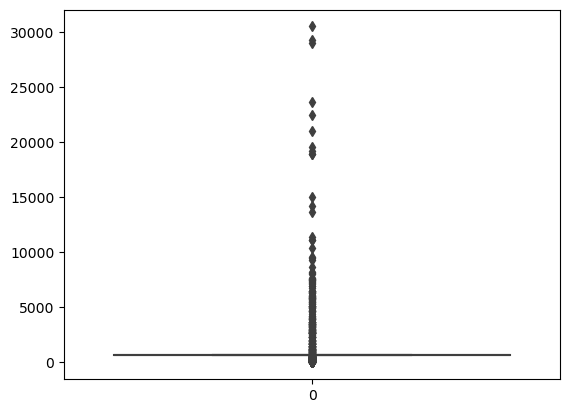

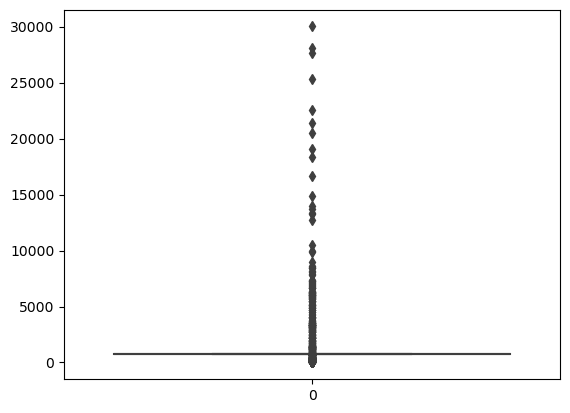

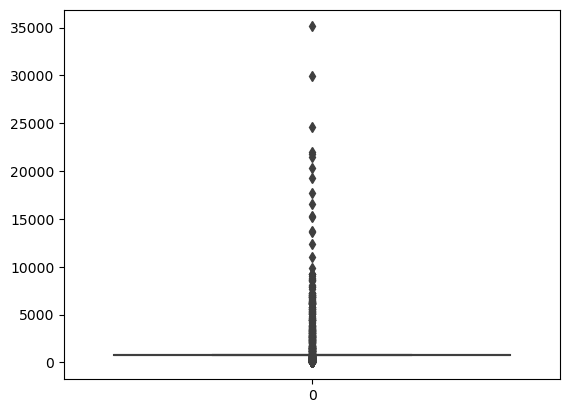

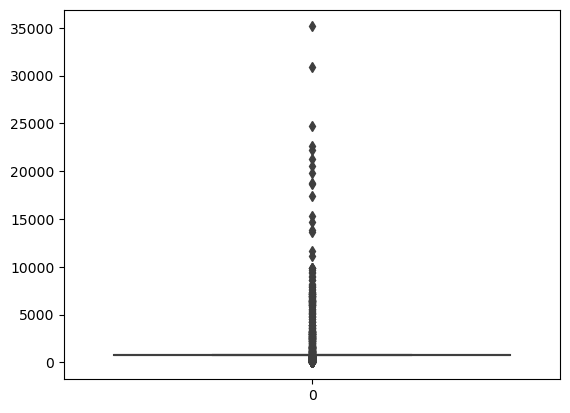

In [302]:
# Checking the Distribution of data
for i in data.columns:
    plt.figure()
    sns.boxplot(data[i]) 

According to the box plot there are outliers in most of the columns. However, we will be removing outliers using Zscore. 

In [97]:
#Removing Outliers 
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
new_data=data[(z<3).all(axis=1)]
print('Old Data Frame:', data.shape[0])
print('New Data Frame:', new_data.shape[0])
print('percentage of loss of data by zscore is :',(data.shape[0]-new_data.shape[0])/data.shape[0])

Old Data Frame: 907
New Data Frame: 866
percentage of loss of data by zscore is : 0.04520396912899669


Data loss is less than 10% of our original data, which is okay. 

In [304]:
# checking the data distribution after removing the outliers 


In [19]:
#Checking skewness after removing outliers 
new_data.skew()

capacity_mw            2.029125
latitude              -0.110925
longitude              0.935570
primary_fuel           0.417203
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

skew value from +0.5 to -0.5, so any data that falls witin this range has skewness. 
Longitute and all the generation_gwh have skewness. Remeber we are predicting primary_fuel and capacity_mn so they are both our targets variables. That means we are not removing skewness on capacity_mn

In [98]:
new_data['longitude'] = np.cbrt(new_data['longitude'])
new_data['generation_gwh_2014'] = np.cbrt(new_data['generation_gwh_2014'])
new_data['generation_gwh_2015'] = np.cbrt(new_data['generation_gwh_2015'])
new_data['generation_gwh_2016'] = np.cbrt(new_data['generation_gwh_2016'])
new_data['generation_gwh_2017'] = np.cbrt(new_data['generation_gwh_2018'])
new_data['generation_gwh_2018'] = np.cbrt(new_data['generation_gwh_2018'])


new_data.skew()

capacity_mw            2.029125
latitude              -0.110925
longitude              0.811533
primary_fuel           0.417203
generation_gwh_2014    0.326483
generation_gwh_2015    0.467136
generation_gwh_2016    0.437781
generation_gwh_2017    0.380761
generation_gwh_2018    0.380761
dtype: float64

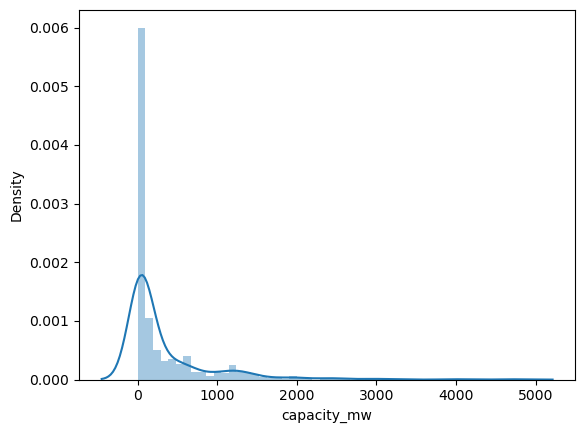

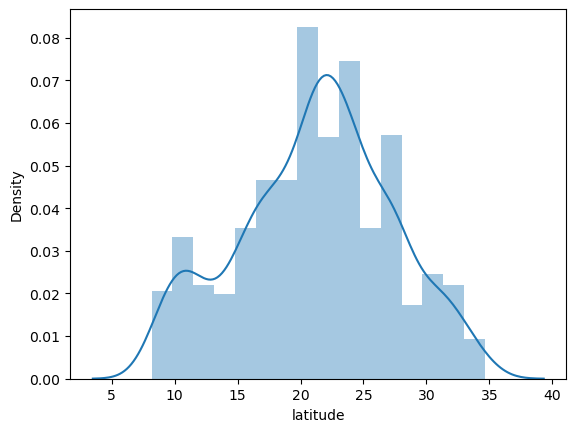

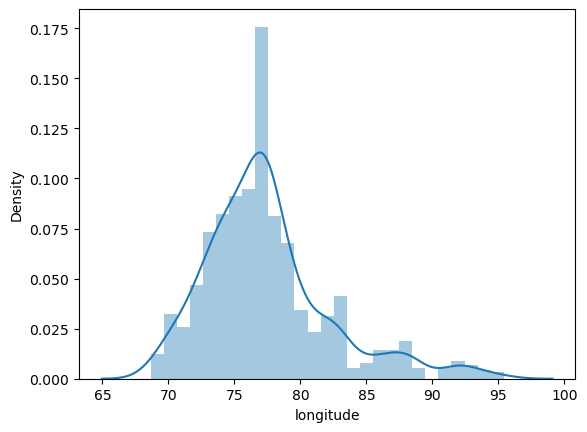

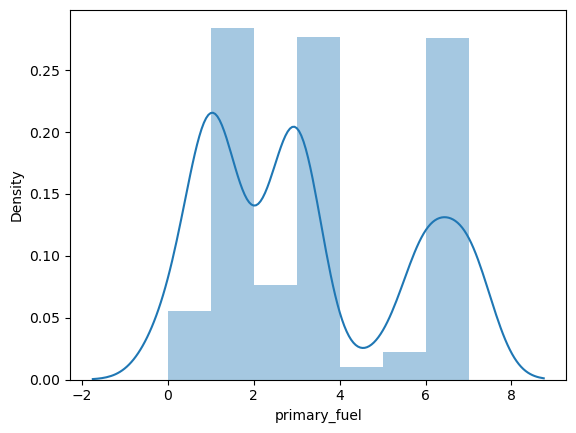

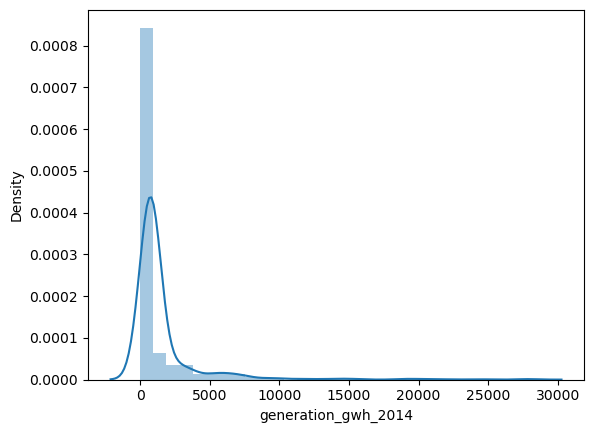

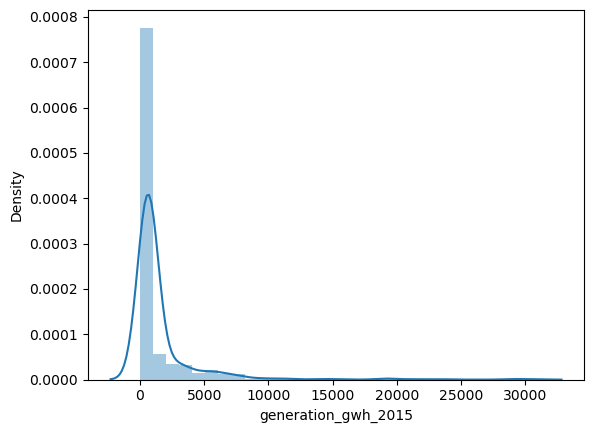

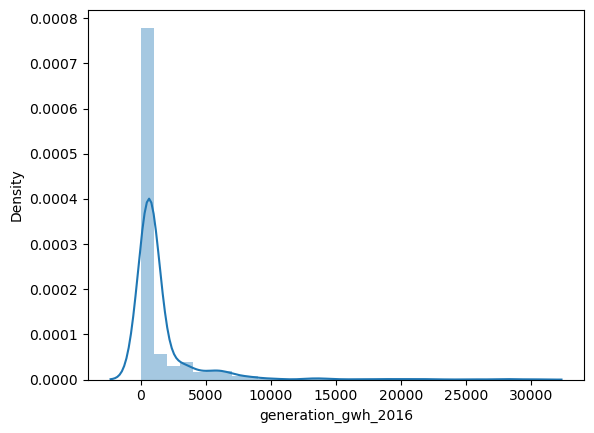

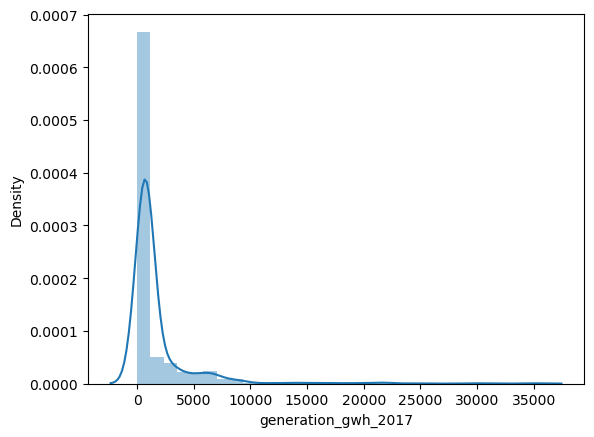

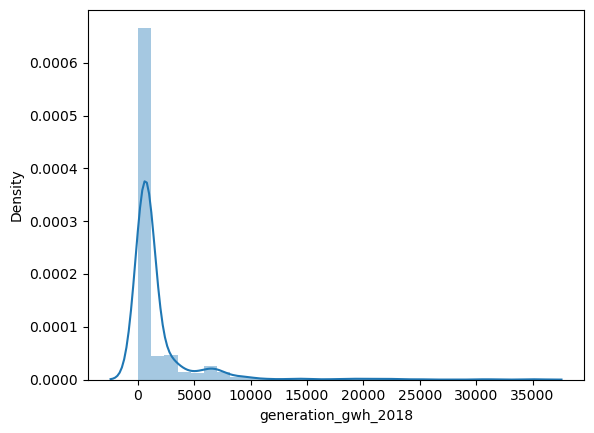

In [307]:
#hecking the data distribution after removing skewness and outlier
for i in new_data.columns:
    plt.figure()
    sns.distplot(data[i])     

Data looks almost normally distributed after the skewness and outliers have been removed

# Checking Multicollinearity problem. 

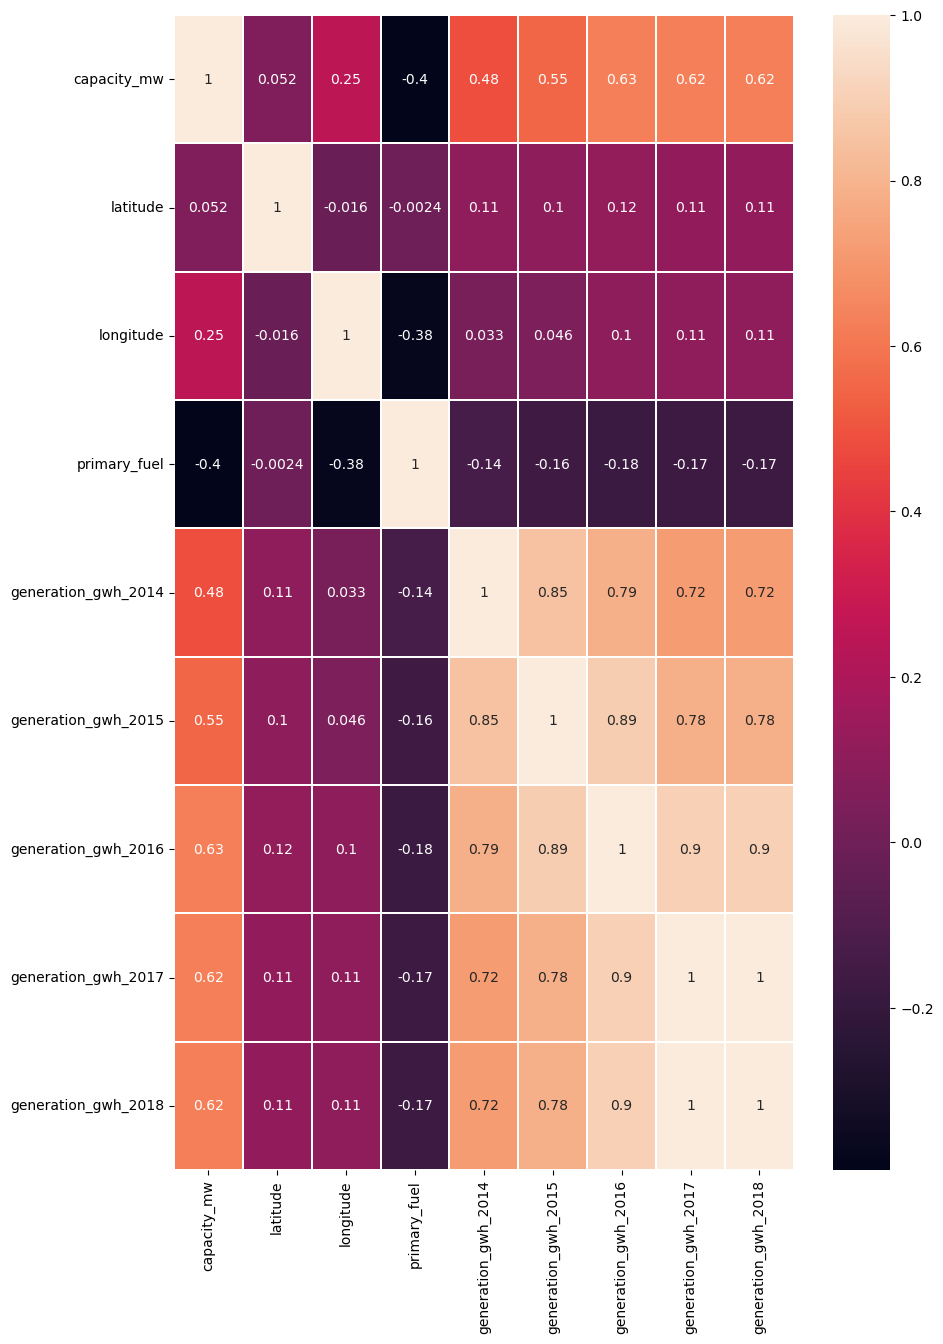

In [308]:
# Ploting the heatmap of correlation between the features and Multicorrilinearity problem.
plt.figure(figsize=(10,15))
sns.heatmap(new_data.corr(),linewidths=.2, annot = True) 
plt.show()

According to the result of the heatmap. It can been seen that power generation_gwh2017 and general_gwh_2018 is showing 1% thats means they are  correlated, both are  depending on each other. When one increases the other increases and that is multicollinearity problem. I will be dropping the power generation columns that has less relationship with target. Thought both relation is showing 62%. 

In [99]:
new_data.drop(['generation_gwh_2017'], axis=1, inplace=True )

In [100]:
# Separating features and Label
x= new_data.drop(['capacity_mw'],axis=1)
y = new_data.capacity_mw

In [23]:
print(len(x),len(y))

866 866


# Split Data into Train and Test and finding the best random state 

In [24]:
# Finding the best random state with Linear Regression 
maxAccu=0
lm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    pred=lm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu,'on random state',maxRS)


Best accuracy is  0.6224911425519443 on random state 87


The Linear Regression model give us the best accuracy at random state of 87

In [25]:
#spliting the data again into train and test at ramdon state of 87
x_train, x_test,y_train, y_test = train_test_split(x, y,test_size=0.20,random_state =87)

# Model Building 

# Linear Regression 

In [26]:
# Training Model 
lrm = LinearRegression()
lrm.fit(x_train,y_train)
print('LRM Train score:', lrm.score(x_train,y_train)*100) # checking model training score 
print('LRM Test Score:', lrm.score(x_test,y_test)*100) # checking model testing score 
lrm_pred = lrm.predict(x_test) # using model to predict on x_test data
print('\n')

print('Error')
print('\nMAE:',mean_absolute_error(y_test,lrm_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,lrm_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,lrm_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,lrm_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Predicted':lrm_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

LRM Train score: 45.852167575489666
LRM Test Score: 66.90295358313286


Error

MAE: 176.3272609281646
MSE: 55582.806456655744
RMSE: 235.76006119921107
R2 score: 0.6690295358313285


Actual  Model Predicted
346   330.00       185.536065
276    24.00        70.572209
625  1000.00       787.469523
211     4.25       110.769601
220   630.00       586.540216
819    28.00       406.288425
86     30.00       -93.958678
829     0.00       148.711864
270    20.00       126.577570
521    11.60       265.158163

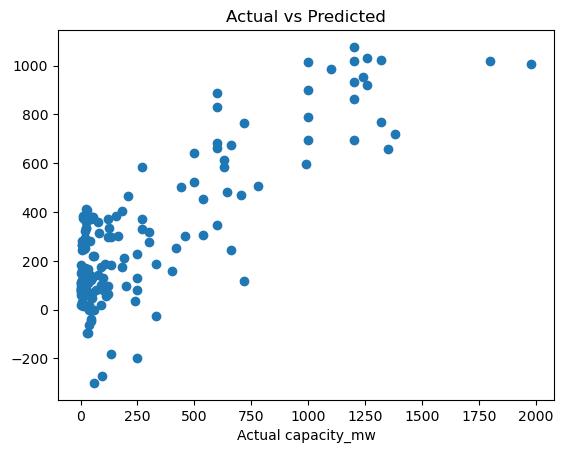

In [27]:
#Visualizing between Actual and Model Prediction 
plt.scatter(y_test,lrm_pred)
plt.xlabel('Actual capacity_mw')
plt.title('Actual vs Predicted')
plt.show()

Linear Regression model r2 score is 66% which is less.  Lets try other model 

## Random Forest Regressor 

In [28]:
# Training Model 
rdf = RandomForestRegressor()
rdf.fit(x_train,y_train)
print('RDF Train score:', rdf.score(x_train,y_train)*100) # checking model training score 
print('RDF Test Score:', rdf.score(x_test,y_test)*100) # checking model testing score 
rdf_pred = rdf.predict(x_test) # using model to predict on x_test data
print('\n')

print('Error')
print('\nMAE:',mean_absolute_error(y_test,rdf_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,rdf_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,rdf_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,rdf_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Predicted':lrm_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

RDF Train score: 96.22349553545928
RDF Test Score: 88.03713628420394


Error

MAE: 81.54965117275144
MSE: 20090.298397248414
RMSE: 141.74024974314253
R2 score: 0.8803713628420393


Actual  Model Predicted
346   330.00       185.536065
276    24.00        70.572209
625  1000.00       787.469523
211     4.25       110.769601
220   630.00       586.540216
819    28.00       406.288425
86     30.00       -93.958678
829     0.00       148.711864
270    20.00       126.577570
521    11.60       265.158163

Random Forest Regressor r2 score is 88%  higher compare to LinearRegression  

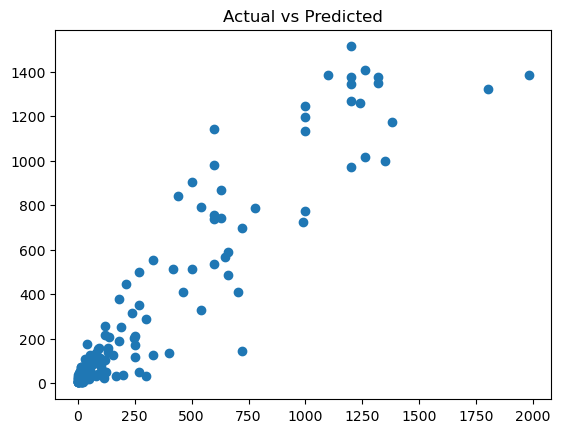

In [29]:
#Visualizing between Actual and Model Prediction 
plt.scatter(y_test,rdf_pred)
plt.title('Actual vs Predicted')
plt.show()

We can clearly see the trend between our Actual  and Model Predicted. 

# Decision Tree Regressor

In [30]:
# Training Model 
dtr = RandomForestRegressor()
dtr.fit(x_train,y_train)
print('DTR Train score:', dtr.score(x_train,y_train)*100) # checking model training score 
print('DTR Test Score:', dtr.score(x_test,y_test)*100) # checking model testing score 
dtr_pred = dtr.predict(x_test) # using model to predict on x_test data
print('\n')

print('Error')
print('\nMAE:',mean_absolute_error(y_test, dtr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,dtr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,dtr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,dtr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Predicted':dtr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

DTR Train score: 96.47371283860637
DTR Test Score: 87.96366234957915


Error

MAE: 80.96835843806019
MSE: 20213.689694357534
RMSE: 142.1748560553431
R2 score: 0.8796366234957915


Actual  Model Predicted
346   330.00       127.587360
276    24.00        31.548173
625  1000.00       737.490000
211     4.25        12.526000
220   630.00       875.498200
819    28.00        20.732000
86     30.00        98.032000
829     0.00        26.866000
270    20.00         4.770500
521    11.60        11.768625

Decision Tree Regressor score is 87%, 1% lesser than Random forest Regressor 

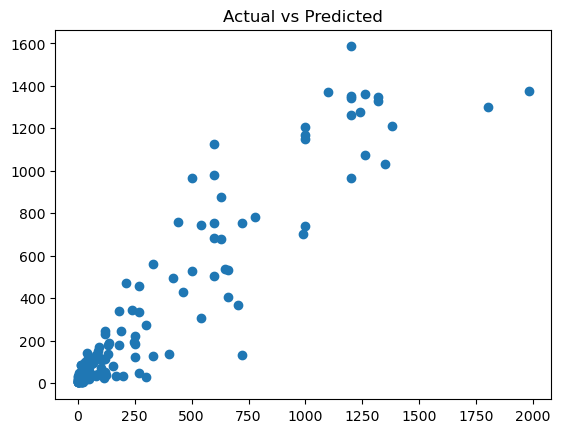

In [31]:
#Visualizing between Actual and Model Prediction 
plt.scatter(y_test,dtr_pred)
plt.title('Actual vs Predicted')
plt.show()

There is a trend between Actual and model Predicted also same compare to Randomforest 

# Extra Trees Regressor

In [32]:
# Training Model 
etr = RandomForestRegressor()
etr.fit(x_train,y_train)
print('ETR Train score:', etr.score(x_train,y_train)*100) # checking model training score 
print('ETR Test Score:', etr.score(x_test,y_test)*100) # checking model testing score 
etr_pred = etr.predict(x_test) # using model to predict on x_test data
print('\n')

print('Error')
print('\nMAE:',mean_absolute_error(y_test, etr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,etr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,etr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,dtr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Predicted':dtr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

ETR Train score: 96.45838618814574
ETR Test Score: 88.5400338558221


Error

MAE: 80.61083529939401
MSE: 19245.737887567106
RMSE: 138.72900881779233
R2 score: 0.8796366234957915


Actual  Model Predicted
346   330.00       127.587360
276    24.00        31.548173
625  1000.00       737.490000
211     4.25        12.526000
220   630.00       875.498200
819    28.00        20.732000
86     30.00        98.032000
829     0.00        26.866000
270    20.00         4.770500
521    11.60        11.768625

Same r2 score 87%  Decision Tree Regressor but the test score is 88%

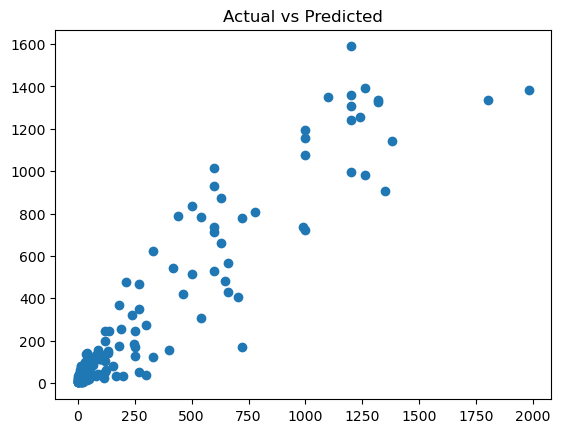

In [33]:
#Visualizing between Actual and Model Prediction 
plt.scatter(y_test,etr_pred)
plt.title('Actual vs Predicted')
plt.show()

Almost same trend 

# Gradient Boosting Regressor

In [34]:
# Training Model 
gdb = RandomForestRegressor()
gdb.fit(x_train,y_train)
print('GDB Train score:', gdb.score(x_train,y_train)*100) # checking model training score 
print('GDB Test Score:', gdb.score(x_test,y_test)*100) # checking model testing score 
gdb_pred = gdb.predict(x_test) # using model to predict on x_test data
print('\n')

print('Error')
print('\nMAE:',mean_absolute_error(y_test, gdb_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,gdb_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,gdb_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,gdb_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Predicted':gdb_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

GDB Train score: 96.52533476896217
GDB Test Score: 87.92495367135155


Error

MAE: 82.55559758453472
MSE: 20278.696611984516
RMSE: 142.4032886277017
R2 score: 0.8792495367135155


Actual  Model Predicted
346   330.00       126.181360
276    24.00        22.658055
625  1000.00       730.856000
211     4.25        15.533000
220   630.00       867.389000
819    28.00        20.673000
86     30.00        87.604967
829     0.00        26.069333
270    20.00         5.659000
521    11.60        10.025700

R2 score 88% same with Random forest Regressor. But GDB is making slight lesser error compare to Reando forest Regressor 

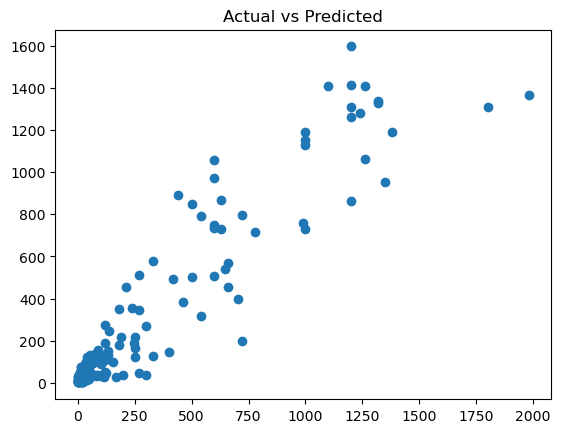

In [35]:
#Visualizing between Actual and Model Prediction 
plt.scatter(y_test,gdb_pred)
plt.title('Actual vs Predicted')
plt.show()

# Support Vector Machine Regressor 

In [36]:
# Training Model 
svr= SVR()
svr.fit(x_train,y_train)
print('SVR Train score:', svr.score(x_train,y_train)*100) # checking model training score 
print('SVR Test Score:', svr.score(x_test,y_test)*100) # checking model testing score 
svr_pred = svr.predict(x_test) # using model to predict on x_test data
print('\n')

print('Error')
print('\nMAE:',mean_absolute_error(y_test, svr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,svr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,svr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,svr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Predicted':svr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

SVR Train score: -13.49770499623113
SVR Test Score: -14.014221382658176


Error

MAE: 234.35998691559047
MSE: 191474.19744346026
RMSE: 437.57764733068836
R2 score: -0.14014221382658176


Actual  Model Predicted
346   330.00        79.640366
276    24.00        40.776309
625  1000.00       127.156875
211     4.25        45.955205
220   630.00       104.798647
819    28.00        48.442094
86     30.00        72.438136
829     0.00        38.934418
270    20.00        36.025661
521    11.60        40.765134

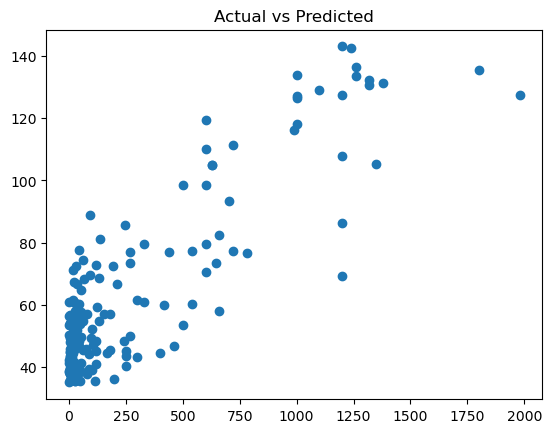

In [37]:
#Visualizing between Actual and Model Prediction 
plt.scatter(y_test,svr_pred)
plt.title('Actual vs Predicted')
plt.show()

# AdaBoostRegressor 

In [38]:
# Training Model 
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
print('ADB Train score:', adb.score(x_train,y_train)*100) # checking model training score 
print('ADB Test Score:', adb.score(x_test,y_test)*100) # checking model testing score 
adb_pred = adb.predict(x_test) # using model to predict on x_test data
print('\n')

print('Error')
print('\nMAE:',mean_absolute_error(y_test, adb_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,adb_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,adb_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,adb_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Predicted':adb_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

ADB Train score: 73.58693172850394
ADB Test Score: 72.93088973219164


Error

MAE: 181.93424828920882
MSE: 45459.55847596997
RMSE: 213.2124726088274
R2 score: 0.7293088973219164


Actual  Model Predicted
346   330.00       213.130687
276    24.00       154.476050
625  1000.00       912.810811
211     4.25       162.607879
220   630.00       682.895152
819    28.00       213.130687
86     30.00       305.305067
829     0.00       162.607879
270    20.00       162.607879
521    11.60       205.160486

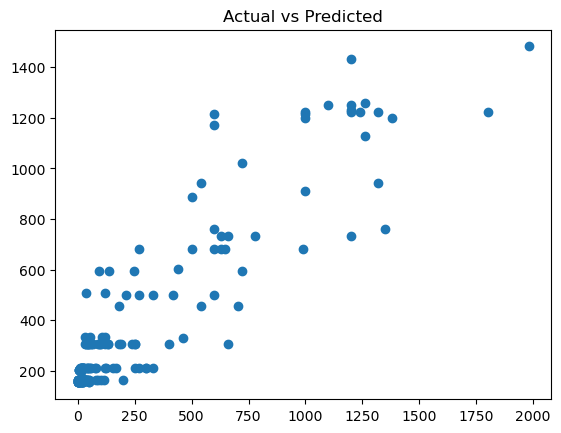

In [39]:
#Visualizing between Actual and Model Prediction 
plt.scatter(y_test,adb_pred)
plt.title('Actual vs Predicted')
plt.show()

Our best model is GradientBoosting Regressor. 

## Checking if our model is overfitting using Regularization Techniques. 

# Using Ridge Regression Model 

RidgeCV will return best_alpha and coeficient after performing 10 cross validations 

In [50]:
#importing the reqularization techniques libraries
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
print(ridgecv.fit(x_train,y_train))
print('best parameter rate :', ridgecv.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))
best parameter rate : 0.09099999999999998


Approximately 0.091. I will be using this best alphal rate for model training 

In [54]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
print('Training score:', ridge_model.fit(x_train,y_train))
print('Testing score:', ridge_model.score(x_test,y_test))
rdm_pred = ridge_model.predict(x_test)

print('\n')

print('Error')
print('\nMAE:',mean_absolute_error(y_test, rdm_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,rdm_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,rdm_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,rdm_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Predicted':rdm_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)




Training score: Ridge(alpha=0.09099999999999998)
Testing score: 0.6689643474622966


Error

MAE: 176.27834480924975
MSE: 55593.75411782614
RMSE: 235.78327785877042
R2 score: 0.6689643474622966


Actual  Model Predicted
346   330.00       185.999959
276    24.00        70.222803
625  1000.00       786.388411
211     4.25       110.139982
220   630.00       587.803235
819    28.00       406.786914
86     30.00       -94.015704
829     0.00       148.207582
270    20.00       126.350610
521    11.60       265.351223

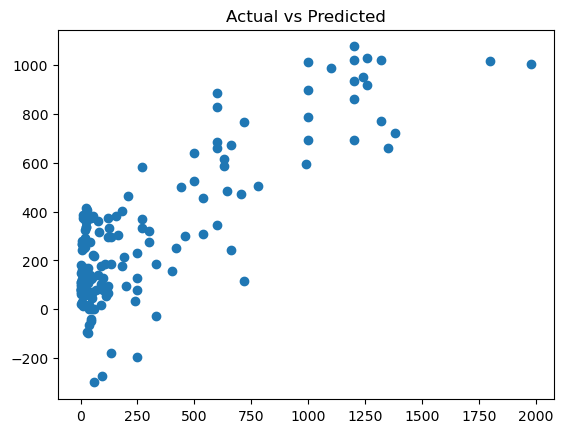

In [55]:
#Visualizing between Actual and Model Prediction 
plt.scatter(y_test,rdm_pred)
plt.title('Actual vs Predicted')
plt.show()

Ridge Model r2 score is 66% still lower than GradientBoosting Regressor 

GradientBoosting is our best model 

# Saving Best  Model 

In [56]:
import pickle
filename='Global_Power_Plant_Database_regression.pkl'
pickle.dump(gdb,open(filename,'wb'))

In [58]:
actual=np.array(y_test)
predicted= np.array(gdb.predict(x_test))
df_com= pd.DataFrame({'Actual':actual, 'predicted':predicted}, index= range(len(actual)))
df_com

Actual   predicted
0     330.00  126.181360
1      24.00   22.658055
2    1000.00  730.856000
3       4.25   15.533000
4     630.00  867.389000
..       ...         ...
169   107.88   97.319500
170    36.00   97.270800
171    34.00   89.126000
172    21.00    5.421000
173     6.00   28.627000

[174 rows x 2 columns]

# Predicting for Primary_fuel

In [101]:
new_data.head()

capacity_mw  latitude  longitude  primary_fuel  generation_gwh_2014  \
0          2.5   28.1839   4.183928             6             9.287522   
1         98.0   24.7663   4.209822             1             9.287522   
2         39.2   21.9038   4.108947             7             9.287522   
3        135.0   23.8712   4.503868             2             8.516872   
4       1800.0   21.9603   4.351694             1            14.479241   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2018  
0             8.926066             9.033641             9.092238  
1             8.926066             9.033641             9.092238  
2             8.926066             9.033641             9.092238  
3             9.449397             9.604586             8.555526  
4            18.086385            18.413278            19.380155

In [102]:
pr_data = new_data

In [103]:
pr_data.skew()

capacity_mw            2.029125
latitude              -0.110925
longitude              0.811533
primary_fuel           0.417203
generation_gwh_2014    0.326483
generation_gwh_2015    0.467136
generation_gwh_2016    0.437781
generation_gwh_2018    0.380761
dtype: float64

Capacity_mw and Longitutde have skewness. Skewness rules if the columns falls with the rand of -0.5 to +0.5 means there is skewness in the data. 

# Removing Skewness using CubeRoot Techniques 

In [104]:
# removing skewness
pr_data['longitude'] = np.cbrt(pr_data['longitude'])
pr_data['capacity_mw'] = np.cbrt(pr_data['capacity_mw'])


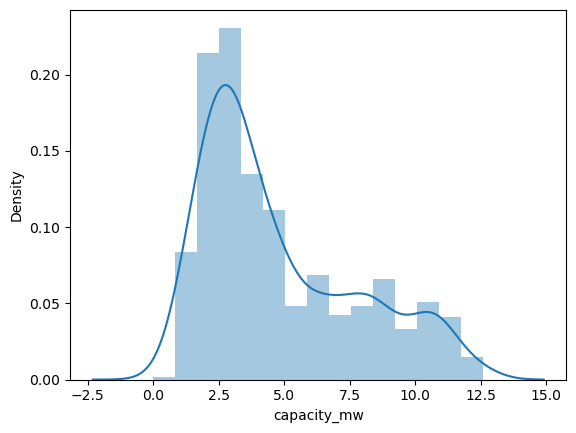

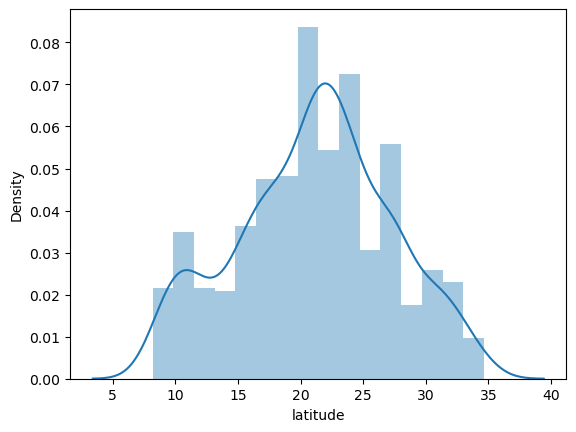

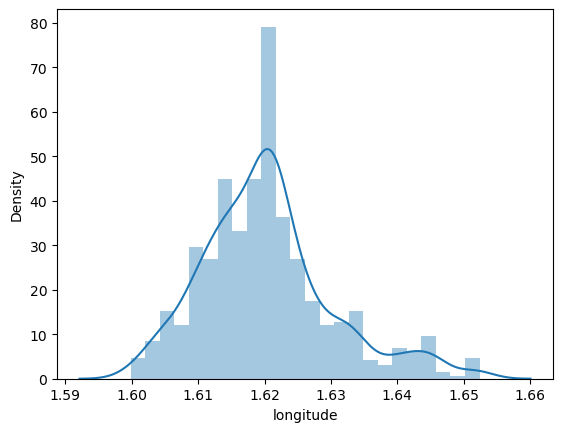

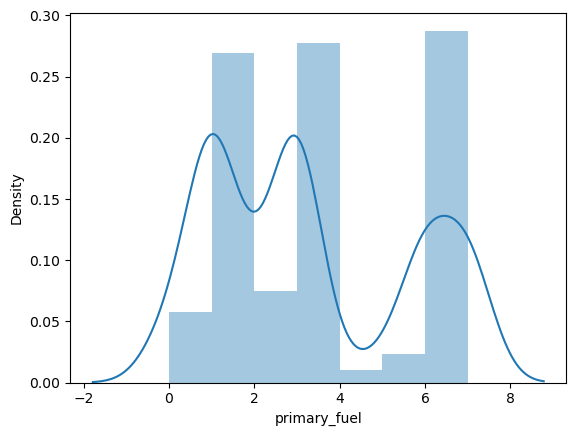

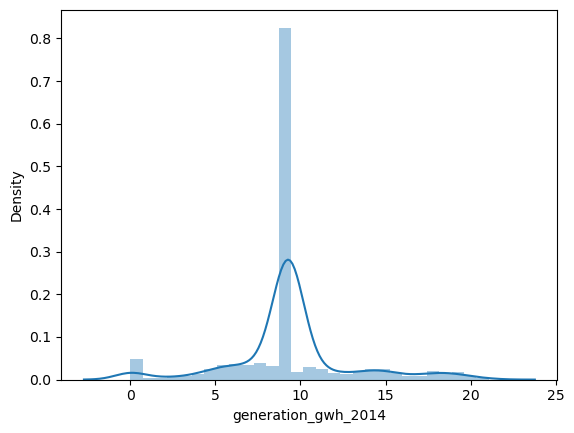

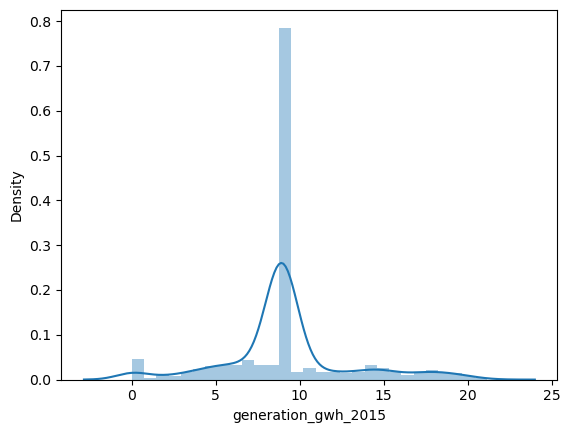

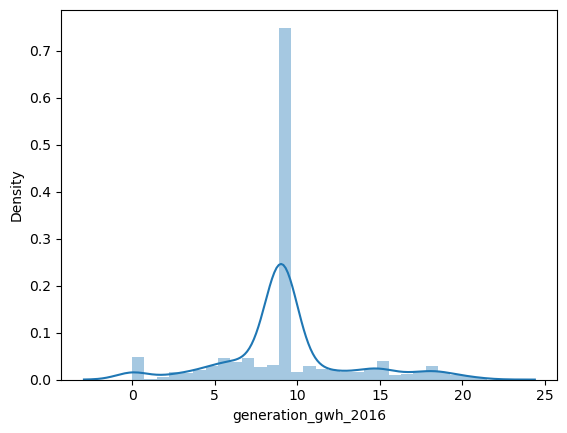

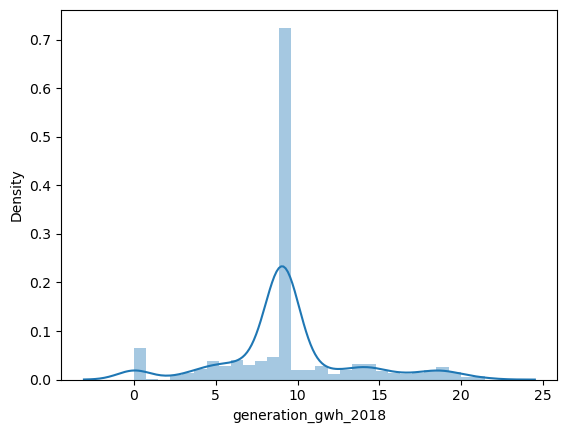

In [105]:
# Checking the data distribution after reoving skewness 
#hecking the data distribution after removing skewness and outlier
for i in pr_data.columns:
    plt.figure()
    sns.distplot(pr_data[i]) 

Data distribution look almost normally distributed after removing the skewness 

# Checking multicollinearity problem 

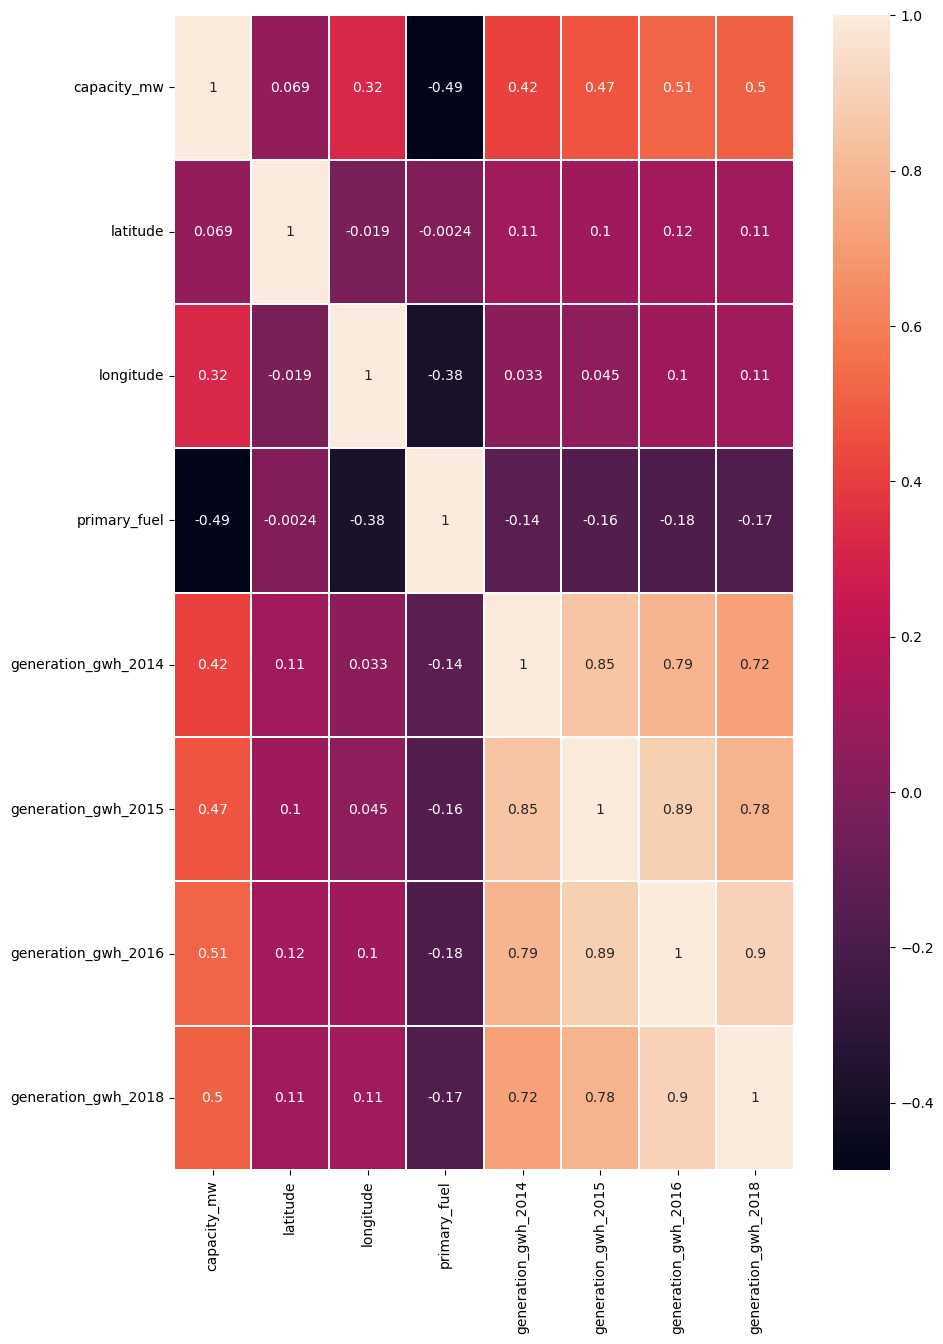

In [106]:
# Ploting the heatmap to check correlation between the features and Multicorrilinearity problem.
plt.figure(figsize=(10,15))
sns.heatmap(pr_data.corr(),linewidths=.2, annot = True) 
plt.show()

According to the result of the heatmap. It can been seen that power generation_gwh2017 and general_gwh_2018 is showing 0.9% thats means they are  correlated, both are  depending on each other. When one increases the other increases and that is multicollinearity problem. I will be dropping the power generation_gwh_2018 columns that has less relationship with target. Thought both relation is showing 0.41%. 

In [107]:
new_data.drop(['generation_gwh_2018'], axis=1, inplace=True )

In [108]:
# Separating features and Label
x= pr_data.drop(['primary_fuel'],axis=1)
y = pr_data.primary_fuel

In [109]:
print(len(x),len(y))

866 866


In [110]:
x1=x
y1=y

In [111]:
y1

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 866, dtype: int32

In [112]:
# Importing the necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV


# Best Random State

In [113]:
# Finding the best random state with Linear Regression 
maxAccu=0
lr=LogisticRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu,'on random state',maxRS)

Best accuracy is  0.2144483805668015 on random state 101


Model performance very low. lets try Decision Tree

In [115]:
# Finding the best random state with Linear Regression 
maxAccu=0
dtc=DecisionTreeClassifier()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train, y_train)
    pred=dtc.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu,'on random state',maxRS)

Best accuracy is  0.6061341960421831 on random state 127


Decision tree gives best accuracy 60% at Random State of 127

### Creating funtion to call model

In [142]:
x_train_a,x_test_a,y_train_a,y_test_a = train_test_split(x1, y1, test_size=0.2, random_state=127)

# Logistic Regression Model 

In [155]:
lr=LogisticRegression()
lr.fit(x_train_a, y_train_a)# Training Model 
print('Training Score:', lr.score(x_train_a, y_train_a))
print('Testing Score:', lr.score(x_test_a, y_test_a))
lr_pred=lr.predict(x_test_a)

# Accuracy Score
acc_score = (accuracy_score(y_test_a, lr_pred))*100
print("Accuracy Score:", acc_score)
print('\n')

# Cross Validation Score
cv_score = (cross_val_score(lr, x1, y1, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

#confusion Matrix
print('Confusion Matrix\n:',confusion_matrix(y_test_a, lr_pred))

# Classification Report
class_report = classification_report(y_test_a, lr_pred)
print("\nClassification Report:\n", class_report)


# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

    
    

Training Score: 0.4725433526011561
Testing Score: 0.4540229885057471
Accuracy Score: 45.40229885057471


Cross Validation Score: 46.532456315195
Confusion Matrix
: [[ 0  0  0  1  0  0  2  6]
 [ 0 33  2 11  1  0  2  4]
 [ 0  2  2  9  0  0  0  1]
 [ 0 12  0 24  0  0  7  7]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  4  0  0 14  3]
 [ 0  0  0 10  0  0  7  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.66      0.62      0.64        53
           2       0.50      0.14      0.22        14
           3       0.40      0.48      0.44        50
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.44      0.67      0.53        21
           7       0.22      0.26      0.24        23

    accuracy                           0.45       174
   macro avg       0.28      0.27      0.26       17

- Testing score : 45%
- Accuracy score : 45%
- cv             : 45%
- diference between cv and accuracy : -0.32
Both accuracy and cv is less but each score is less than 50% the performance not too good 

# DecisionTree Classifier Model

In [167]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train_a, y_train_a)# Training Model 
print('Training Score:', dtc.score(x_train_a, y_train_a))
print('Testing Score:', dtc.score(x_test_a, y_test_a))
dtc_pred=dtc.predict(x_test_a)

# Accuracy Score
acc_score = (accuracy_score(y_test_a, dtc_pred))*100
print("Accuracy Score:", acc_score)
print('\n')

# Cross Validation Score
cv_score = (cross_val_score(dtc, x1, y1, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

#confusion Matrix
print('Confusion Matrix\n:',confusion_matrix(y_test_a, dtc_pred))

# Classification Report
class_report = classification_report(y_test_a, dtc_pred)
print("\nClassification Report:\n", class_report)


# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

    
    

Training Score: 0.9956647398843931
Testing Score: 0.6954022988505747
Accuracy Score: 69.54022988505747


Cross Validation Score: 65.0056474652847
Confusion Matrix
: [[ 6  2  0  0  0  0  1  0]
 [ 1 40  3  7  0  1  0  1]
 [ 0  2  6  2  0  2  0  2]
 [ 0  5  2 35  1  1  3  3]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  1  0  1  0  0 16  3]
 [ 0  0  0  3  0  0  3 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.75      0.75      0.75        53
           2       0.55      0.43      0.48        14
           3       0.73      0.70      0.71        50
           4       0.00      0.00      0.00         3
           5       0.20      1.00      0.33         1
           6       0.70      0.76      0.73        21
           7       0.65      0.74      0.69        23

    accuracy                           0.70       174
   macro avg       0.55      0.63      0.56       1

- Testing score : 99%
- Accuracy score : 68%
- cv             : 68%
- diference between cv and accuracy : 4%
. 
Difference between cv score and accuracy is less,-model performance is good 

# AdaBoost Classifier Model

In [168]:
ada=AdaBoostClassifier()
ada.fit(x_train_a, y_train_a)# Training Model 
print('Training Score:', ada.score(x_train_a, y_train_a))
print('Testing Score:', ada.score(x_test_a, y_test_a))
ada_pred=ada.predict(x_test_a)

# Accuracy Score
acc_score = (accuracy_score(y_test_a, ada_pred))*100
print("Accuracy Score:", acc_score)
print('\n')

# Cross Validation Score
cv_score = (cross_val_score(ada, x1, y1, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

#confusion Matrix
print('Confusion Matrix\n:',confusion_matrix(y_test_a, ada_pred))

# Classification Report
class_report = classification_report(y_test_a, ada_pred)
print("\nClassification Report:\n", class_report)


# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

    
    

Training Score: 0.37427745664739887
Testing Score: 0.39655172413793105
Accuracy Score: 39.6551724137931


Cross Validation Score: 37.05800279051226
Confusion Matrix
: [[ 0  0  0  9  0  0  0  0]
 [ 0 36  0 15  1  1  0  0]
 [ 0  2  0 10  2  0  0  0]
 [ 0 17  0 33  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0 21  0  0  0  0]
 [ 0  0  0 23  0  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.62      0.68      0.65        53
           2       0.00      0.00      0.00        14
           3       0.29      0.66      0.41        50
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        23

    accuracy                           0.40       174
   macro avg       0.11      0.17      0.13      

- Testing score : 37%
- Accuracy score : 39%
- cv             : 68%
- diference between cv and accuracy : 2%
. 
Difference between cv score and accuracy is less, but each their score is less than 50% model performance very poor

# KNeighborsClassifier Model 

In [161]:
knn=KNeighborsClassifier()
knn.fit(x_train_a, y_train_a)# Training Model 
print('Training Score:', knn.score(x_train_a, y_train_a))
print('Testing Score:', knn.score(x_test_a, y_test_a))
knn_pred=knn.predict(x_test_a)

# Accuracy Score
acc_score = (accuracy_score(y_test_a, knn_pred))*100
print("Accuracy Score:", acc_score)
print('\n')

# Cross Validation Score
cv_score = (cross_val_score(ada, x1, y1, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

#confusion Matrix
print('Confusion Matrix\n:',confusion_matrix(y_test_a, knn_pred))

# Classification Report
class_report = classification_report(y_test_a, knn_pred)
print("\nClassification Report:\n", class_report)


# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

    
    

Training Score: 0.7254335260115607
Testing Score: 0.5632183908045977
Accuracy Score: 56.32183908045977


Cross Validation Score: 37.17360972692844
Confusion Matrix
: [[ 5  0  0  1  0  0  1  2]
 [ 3 37  4  5  0  1  0  3]
 [ 1  6  4  1  0  0  0  2]
 [ 1  7  3 31  0  0  3  5]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  2  0  3  0  0 10  6]
 [ 1  4  2  3  0  0  3 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.63      0.70      0.66        53
           2       0.31      0.29      0.30        14
           3       0.70      0.62      0.66        50
           4       0.00      0.00      0.00         3
           5       0.50      1.00      0.67         1
           6       0.59      0.48      0.53        21
           7       0.36      0.43      0.39        23

    accuracy                           0.56       174
   macro avg       0.44      0.51      0.46       

- Training Score: 0.7254335260115607
- Testing Score: 0.5632183908045977
- Accuracy Score: 56.32183908045977
- CV:53.690189788826515

Accuracy Score - Cross Validation Score is high model not performance too well



# SVC Model 

In [169]:
svc=SVC()
svc.fit(x_train_a, y_train_a)# Training Model 
print('Training Score:', svc.score(x_train_a, y_train_a))
print('Testing Score:', svc.score(x_test_a, y_test_a))
svc_pred=svc.predict(x_test_a)

# Accuracy Score
acc_score = (accuracy_score(y_test_a, svc_pred))*100
print("Accuracy Score:", acc_score)
print('\n')

# Cross Validation Score
cv_score = (cross_val_score(svc, x1, y1, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

#confusion Matrix
print('Confusion Matrix\n:',confusion_matrix(y_test_a, svc_pred))

# Classification Report
class_report = classification_report(y_test_a, svc_pred)
print("\nClassification Report:\n", class_report)


# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

    
    

Training Score: 0.5679190751445087
Testing Score: 0.5172413793103449
Accuracy Score: 51.724137931034484


Cross Validation Score: 54.61364693375857
Confusion Matrix
: [[ 0  0  0  0  0  0  2  7]
 [ 0 37  0  5  0  0  2  9]
 [ 0  5  1  2  0  0  0  6]
 [ 0  9  0 28  0  0  5  8]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 0  3  0  0  0  0 13  5]
 [ 0  2  0  0  0  0 10 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.63      0.70      0.66        53
           2       1.00      0.07      0.13        14
           3       0.80      0.56      0.66        50
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.41      0.62      0.49        21
           7       0.23      0.48      0.31        23

    accuracy                           0.52       174
   macro avg       0.38      0.30      0.28      

svc model accuracy and cv has slight difference that close model performance  is good 

# ExtraTreesClassifier

In [171]:
etr=ExtraTreesClassifier()
etr.fit(x_train_a, y_train_a)# Training Model 
print('Training Score:', etr.score(x_train_a, y_train_a))
print('Testing Score:', etr.score(x_test_a, y_test_a))
etr_pred=etr.predict(x_test_a)

# Accuracy Score
acc_score = (accuracy_score(y_test_a, etr_pred))*100
print("Accuracy Score:", acc_score)
print('\n')

# Cross Validation Score
cv_score = (cross_val_score(etr, x1, y1, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

#confusion Matrix
print('Confusion Matrix\n:',confusion_matrix(y_test_a, etr_pred))

# Classification Report
class_report = classification_report(y_test_a, etr_pred)
print("\nClassification Report:\n", class_report)


# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

    
    

Training Score: 0.9956647398843931
Testing Score: 0.735632183908046
Accuracy Score: 73.5632183908046


Cross Validation Score: 71.82313467543683
Confusion Matrix
: [[ 7  0  0  1  0  0  1  0]
 [ 2 45  2  3  0  1  0  0]
 [ 1  2  5  3  0  2  0  1]
 [ 1  3  1 39  0  0  3  3]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  2  0  0 15  4]
 [ 1  2  0  3  0  0  1 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.82      0.85      0.83        53
           2       0.62      0.36      0.45        14
           3       0.76      0.78      0.77        50
           4       0.00      0.00      0.00         3
           5       0.25      1.00      0.40         1
           6       0.75      0.71      0.73        21
           7       0.67      0.70      0.68        23

    accuracy                           0.74       174
   macro avg       0.56      0.65      0.57       17

Accuracy score and cv has slight difference, model performance is consider good 

# RandomForestClassifier()

In [172]:
rdf=RandomForestClassifier()
rdf.fit(x_train_a, y_train_a)# Training Model 
print('Training Score:', rdf.score(x_train_a, y_train_a))
print('Testing Score:', rdf.score(x_test_a, y_test_a))
rdf_pred=rdf.predict(x_test_a)

# Accuracy Score
acc_score = (accuracy_score(y_test_a, rdf_pred))*100
print("Accuracy Score:", acc_score)
print('\n')

# Cross Validation Score
cv_score = (cross_val_score(rdf, x1, y1, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

#confusion Matrix
print('Confusion Matrix\n:',confusion_matrix(y_test_a, rdf_pred))

# Classification Report
class_report = classification_report(y_test_a, rdf_pred)
print("\nClassification Report:\n", class_report)


# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

    
    

Training Score: 0.9956647398843931
Testing Score: 0.7183908045977011
Accuracy Score: 71.83908045977012


Cross Validation Score: 71.01521493588466
Confusion Matrix
: [[ 7  1  0  0  0  0  1  0]
 [ 2 43  1  6  0  1  0  0]
 [ 1  2  5  3  0  2  0  1]
 [ 2  3  1 38  0  1  2  3]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  1  0  2  0  0 14  4]
 [ 1  1  0  2  0  0  2 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
           1       0.80      0.81      0.80        53
           2       0.71      0.36      0.48        14
           3       0.75      0.76      0.75        50
           4       0.00      0.00      0.00         3
           5       0.20      1.00      0.33         1
           6       0.74      0.67      0.70        21
           7       0.68      0.74      0.71        23

    accuracy                           0.72       174
   macro avg       0.55      0.64      0.55       

#### Best Model is RandomForest Classifier It has less score and high score each for both accuracy and cv compare to svc model with lesser score of -2 but both accuracy and cv is less than 51%, compare to RandomForest accuracy and cv having 71%

# Hyper Parameter Tuning Using GridSearchCV

In [212]:
params = {'n_estimators': [10,100,300,500,1300],
          'criterion': ['entropy', 'gini'],
          'max_depth': [15,20,30,40],
          'min_samples_split': [10,15,20,30],
          'min_samples_leaf': [10,15,20,25]}

grd = GridSearchCV(rdf,param_grid = params)

grd.fit(x_train_a, y_train_a)

print('best_params = >', grd.best_params_)
         

best_params = > {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 500}


# Saving Model 

In [213]:
tuned_rdf = grd.best_estimator_ #reinstantiate 

tuned_rdf.fit(x_train_a, y_train_a)
print('Training Score:', tuned_rdf.score(x_train_a, y_train_a))
print('Testing Score:', tuned_rdf.score(x_test_a, y_test_a))
tuned_rdf_pred=tuned_rdf.predict(x_test_a)

# Accuracy Score
acc_score = (accuracy_score(y_test_a, tuned_rdf_pred))*100
print("Accuracy Score:", acc_score)
# Cross Validation Score
cv_score = (cross_val_score(tuned_rdf, x1, y1, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

#confusion Matrix
print('Confusion Matrix\n:',confusion_matrix(y_test_a, tuned_rdf_pred))

# Classification Report
class_report = classification_report(y_test_a, tuned_rdf_pred)
print("\nClassification Report:\n", class_report)
    

Training Score: 0.7557803468208093
Testing Score: 0.6264367816091954
Accuracy Score: 62.643678160919535
Cross Validation Score: 64.54787057338382
Confusion Matrix
: [[ 5  2  0  0  0  0  1  1]
 [ 2 39  1  6  0  0  2  3]
 [ 1  3  2  4  0  0  0  4]
 [ 1  7  0 35  0  1  1  5]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 0  1  0  0  0  0 14  6]
 [ 2  0  0  4  0  0  3 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.71      0.74      0.72        53
           2       0.67      0.14      0.24        14
           3       0.71      0.70      0.71        50
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.67      0.67      0.67        21
           7       0.41      0.61      0.49        23

    accuracy                           0.63       174
   macro avg       0.45      0.43      0.42       1

After tuning the model the Accuracy score is 62% and cv is 64% but lower than our model score. 

In [210]:
import pickle
filename='Global_Power_Plant_Database_classifier.pkl'
pickle.dump(tuned_rdf,open(filename,'wb'))

In [211]:
actual=np.array(y_test_a)
predicted= np.array(tuned_rdf.predict(x_test_a))
df_com= pd.DataFrame({'Actual':actual, 'predicted':predicted}, index= range(len(actual)))
df_com

Actual  predicted
0         7          7
1         1          1
2         1          1
3         7          7
4         3          3
..      ...        ...
169       1          6
170       3          3
171       3          7
172       6          6
173       1          3

[174 rows x 2 columns]